In [198]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.lines import Line2D
from matplotlib.patches import Wedge
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from functools import reduce

In [199]:
#import dataset for men
dfm = pd.read_excel("./data/NCDRISK2019_data.xlsx", index_col=None, sheet_name="men")
dfm = dfm.sort_values("Year").reset_index(drop=True)
# df2.to_csv("NCDRISK2019_data.csv", index=False)
dfm.head()

#import dataset for women
dfw = pd.read_excel("./data/NCDRISK2019_data.xlsx", index_col=None, sheet_name="women")
dfw = dfw.sort_values("Year").reset_index(drop=True)
dfw.head()

#merging dataframes
# Assuming dfm and dfw have indexes set to 'country' and 'ISO'
merged_df = pd.merge(dfm, dfw, on=['Country', 'ISO'], how='inner')
merged_df.head(200)

,Country,ISO,Sex_x,Year_x,Age_x,htn_x,diag(%),treat_x,control_x,untreated_stage2HTN,Sex_y,Year_y,Age_y,htn_y,diag,treat_y,control_y,Proportion of untreated stage 2 hypertension among all hypertension
0,Zimbabwe,ZWE,Men,2019,Age standardised (30-79 years),0.368610,0.381765,0.274812,0.123844,0.260777,Women,2019,Age standardised (30-79 years),0.464479,0.535012,0.405860,0.189487,0.221870
1,Namibia,NAM,Men,2019,Age standardised (30-79 years),0.426126,0.456429,0.389148,0.176984,0.233671,Women,2019,Age standardised (30-79 years),0.447866,0.573359,0.481344,0.244796,0.170602
2,Nauru,NRU,Men,2019,Age standardised (30-79 years),0.437461,0.489947,0.275863,0.127889,0.224426,Women,2019,Age standardised (30-79 years),0.396940,0.573998,0.299938,0.171924,0.297023
3,Nepal,NPL,Men,2019,Age standardised (30-79 years),0.396034,0.303194,0.159046,0.058955,0.287766,Women,2019,Age standardised (30-79 years),0.339239,0.355318,0.212113,0.084735,0.265161
4,Netherlands,NLD,Men,2019,Age standardised (30-79 years),0.362011,0.487507,0.396378,0.205377,0.144998,Women,2019,Age standardised (30-79 years),0.248101,0.550039,0.464513,0.264570,0.184301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Vanuatu,VUT,Men,2019,Age standardised (30-79 years),0.374335,0.238838,0.110061,0.036014,0.273145,Women,2019,Age standardised (30-79 years),0.417825,0.358426,0.160312,0.061433,0.330665
196,Venezuela,VEN,Men,2019,Age standardised (30-79 years),0.397236,0.647998,0.542168,0.253400,0.115678,Women,2019,Age standardised (30-79 years),0.390840,0.794475,0.712651,0.395981,0.082775
197,Viet Nam,VNM,Men,2019,Age standardised (30-79 years),0.329255,0.423405,0.260703,0.107219,0.267051,Women,2019,Age standardised (30-79 years),0.264334,0.528946,0.341597,0.149822,0.188746
198,Yemen,YEM,Men,2019,Age standardised (30-79 years),0.290514,0.405692,0.336313,0.131305,0.167496,Women,2019,Age standardised (30-79 years),0.295783,0.493065,0.392920,0.197968,0.131662


In [200]:
#adding male and female together
merged_df['htn'] = merged_df[['htn_x', 'htn_y']].mean(axis=1)
merged_df['treat'] = merged_df[['treat_x', 'treat_y']].mean(axis=1)
merged_df['control'] = merged_df[['control_x', 'control_y']].mean(axis=1)
merged_df['diagn'] = merged_df[['diag(%)', 'diag']].mean(axis=1)
merged_df['untreatedstage2HTN'] = merged_df[['untreated_stage2HTN', 'Proportion of untreated stage 2 hypertension among all hypertension']].mean(axis=1)
merged_df.columns

Index(['Country', 'ISO', 'Sex_x', 'Year_x', 'Age_x', 'htn_x', 'diag(%)',
       'treat_x', 'control_x', 'untreated_stage2HTN', 'Sex_y', 'Year_y',
       'Age_y', 'htn_y', 'diag', 'treat_y', 'control_y',
       'Proportion of untreated stage 2 hypertension among all hypertension',
       'htn', 'treat', 'control', 'diagn', 'untreatedstage2HTN'],
      dtype='object')

In [201]:
df = merged_df.rename(columns={"ISO":"Code"})
df.columns
df.to_excel("NCDRISK2019_data2.xlsx", index=False)

In [202]:
#load the dataset with country classification information
df = pd.read_excel("./NCDRISK2019_data2.xlsx", usecols=['Country', 'Code','Sex_x', 'Year_x', 'diagn','htn', 'treat', 'control', 'untreatedstage2HTN'])
df.columns

Index(['Country', 'Code', 'Sex_x', 'Year_x', 'htn', 'treat', 'control',
       'diagn', 'untreatedstage2HTN'],
      dtype='object')

In [203]:
df1 = pd.read_excel("./data/country_class.xlsx")
df1.columns

df2 = pd.read_csv("./data/physicians-per-1000-people.csv")
df2.columns

# Sort DataFrame by 'country'
df2_sorted = df2.sort_values(by=['Country_a', 'Year_a'])

# Group by 'country' and get the last row for each group
df_last = df2_sorted.groupby('Country_a').tail(1) 

df_last['phy']=df_last['phy']*10   #diving by 10 to put physicians per 1000 to physicians per 10,000
df_last.head(220)


# # Save the unequal_values_df DataFrame to an Excel file
# df_last.to_csv('data3.csv', index=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_18608\4039820276.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['phy']=df_last['phy']*10   #diving by 10 to put physicians per 1000 to physicians per 10,000


,Indicator_a,Country_a,Code,Year_a,phy
25,Physician per 1000,Afghanistan,AFG,2020,2.540000
60,Physician per 1000,Albania,ALB,2020,18.830000
75,Physician per 1000,Algeria,DZA,2018,17.320000
77,Physician per 1000,American Samoa,ASM,1999,7.810000
90,Physician per 1000,Andorra,AND,2015,36.260000
...,...,...,...,...,...
4834,Physician per 1000,Vanuatu,VUT,2019,1.580000
4853,Physician per 1000,Venezuela,VEN,2017,16.640000
4875,Physician per 1000,Vietnam,VNM,2016,8.330000
4879,Physician per 1000,World,OWID_WRL,2019,17.006011


In [204]:
#CHWs FactValueNumeric
#Nurses FactValueNumeric
#Pharma FactValueNumeric

# Nursing and midwifery personnel (per 10,000)
# Pharmacists  (per 10,000)

# Indicator SpatialDimValueCode Location Period ParentLocation

dfa = pd.read_csv("./data/nurses.csv")
filtered_dfa = dfa[dfa['Indicator_b'] == "Nursing and midwifery personnel (per 10,000)"]
#rename SpatialDimValueCode = Code Location=Country Period=Year ParentLocation=GeoRegion 
dfa = filtered_dfa.rename(columns={"SpatialDimValueCode" : "Code", "Location":"Country_b", "Period":"Year_b", "ParentLocation":"GeoRegion_b","FactValueNumeric":"nurse"})
# Sort DataFrame by 'country'
dfa_sorted = dfa.sort_values(by=['Country_b', 'Year_b'])
# Group by 'country' and get the last row for each group
dfa_last = dfa_sorted.groupby('Country_b').tail(1) 
# Keep only the desired columns
columns_to_keep = ['Indicator_b', 'Code', 'Country_b', 'Year_b', 'GeoRegion_b', 'nurse']
dfa_last  = dfa_last[columns_to_keep]


dfb = pd.read_csv("./data/pharma.csv")
filtered_dfb = dfb[dfb['Indicator_c'] == "Pharmacists  (per 10,000)"]
#rename SpatialDimValueCode = Code Location=Country Period=Year ParentLocation=GeoRegion 
dfb = filtered_dfb.rename(columns={"SpatialDimValueCode" : "Code", "Location":"Country_c", "Period":"Year_c", "ParentLocation":"GeoRegion_c","FactValueNumeric":"pharma"})
# Sort DataFrame by 'country'
dfb_sorted = dfb.sort_values(by=['Country_c', 'Year_c'])
# Group by 'country' and get the last row for each group
dfb_last = dfb_sorted.groupby('Country_c').tail(1)
columns_to_keep = ['Indicator_c', 'Code', 'Country_c', 'Year_c', 'GeoRegion_c', 'pharma']
dfb_last  = dfb_last[columns_to_keep]


dfc = pd.read_csv("./data/chws.csv")
#rename SpatialDimValueCode = Code Location=Country Period=Year ParentLocation=GeoRegion 
dfc = dfc.rename(columns={"SpatialDimValueCode" : "Code", "Location":"Country_d", "Period":"Year_d", "ParentLocation":"GeoRegion_d","FactValueNumeric":"chws_n"})
# Sort DataFrame by 'country'
dfc_sorted = dfc.sort_values(by=['Country_d', 'Year_d'])
# Group by 'country' and get the last row for each group
dfc_last = dfc_sorted.groupby('Country_d').tail(1)
columns_to_keep = ['Indicator_d', 'Code', 'Country_d', 'Year_d', 'GeoRegion_d', 'chws_n']
dfc_last  = dfc_last[columns_to_keep]
dfc_last.columns

Index(['Indicator_d', 'Code', 'Country_d', 'Year_d', 'GeoRegion_d', 'chws_n'], dtype='object')

In [205]:
#merging the dataframes
# Assuming dfm and dfw have indexes set to 'country' and 'ISO'
# List of dataframes to be merged

dfs = [dfa_last, dfb_last, dfc_last, df_last]

# Merge all dataframes in the list
df_hw = reduce(lambda left, right: pd.merge(left, right, on='Code', how='outer'), dfs)
df_hw.head(10)
df_hw.to_excel("hw.xlsx")

In [206]:
df_hw.to_excel("hw.xlsx")


In [207]:
import pandas as pd
from functools import reduce

# List of dataframes to be merged
dfs = [df, df1, df_hw]

# Merge all dataframes in the list
df = reduce(lambda left, right: pd.merge(left, right, on='Code', how='inner'), dfs)
df.head(10)

df.columns


Index(['Country_x', 'Code', 'Sex_x', 'Year_x', 'htn', 'treat', 'control',
       'diagn', 'untreatedstage2HTN', 'Country_y', 'Income', 'pop', 'pop_tot',
       'Indicator_b', 'Country_b', 'Year_b', 'GeoRegion_b', 'nurse',
       'Indicator_c', 'Country_c', 'Year_c', 'GeoRegion_c', 'pharma',
       'Indicator_d', 'Country_d', 'Year_d', 'GeoRegion_d', 'chws_n',
       'Indicator_a', 'Country_a', 'Year_a', 'phy'],
      dtype='object')

In [208]:
df['chws']=df['chws_n']*10000/df['pop_tot']
df['chws'].notna().sum() #we have CHW data from 96 countries 

#assign the value of 0 for those countries which does not have CHWs or have flagged value of 0
#chws
df['chws'] = df['chws'].fillna(0)
df['chws'].count
#physicians
df['phy'] = df['phy'].fillna(0)
df['phy'].count
#pharma
df['pharma'] = df['pharma'].fillna(0)
df['pharma'].count
#nurses
df['nurse'] = df['nurse'].fillna(0)
df['nurse'].count

#total health workers combining nurses, pharmacist, chws and physicians 
df['hw']=df['phy']+df['nurse']+df['pharma']+df['chws']
df.to_excel("hw.xlsx")
df.head(10)

,Country_x,Code,Sex_x,Year_x,htn,treat,control,diagn,untreatedstage2HTN,Country_y,...,Country_d,Year_d,GeoRegion_d,chws_n,Indicator_a,Country_a,Year_a,phy,chws,hw
0,Zimbabwe,ZWE,Men,2019,0.416545,0.340336,0.156665,0.458389,0.241324,Zimbabwe,...,Zimbabwe,2022.0,Africa,19722.0,Physician per 1000,Zimbabwe,2020.0,1.89,11.269714,35.759714
1,Namibia,NAM,Men,2019,0.436996,0.435246,0.210890,0.514894,0.202136,Namibia,...,Namibia,2018.0,Africa,2292.0,Physician per 1000,Namibia,2018.0,6.01,8.488889,50.598889
2,Nauru,NRU,Men,2019,0.417201,0.287901,0.149907,0.531973,0.260725,Nauru,...,Nauru,2015.0,Western Pacific,17.0,Physician per 1000,Nauru,2015.0,12.50,17.000000,101.880000
3,Nepal,NPL,Men,2019,0.367636,0.185580,0.071845,0.329256,0.276464,Nepal,...,Nepal,2020.0,South-East Asia,51240.0,Physician per 1000,Nepal,2021.0,8.67,16.529032,61.799032
4,Netherlands,NLD,Men,2019,0.305056,0.430445,0.234974,0.518773,0.164650,Netherlands,...,NaN,NaN,NaN,NaN,Physician per 1000,Netherlands,2020.0,38.36,0.000000,157.140000
5,New Zealand,NZL,Men,2019,0.310038,0.496858,0.275839,0.631013,0.127073,New Zealand,...,NaN,NaN,NaN,NaN,Physician per 1000,New Zealand,2021.0,35.16,0.000000,159.570000
6,Nicaragua,NIC,Men,2019,0.356828,0.594675,0.337923,0.660216,0.123314,Nicaragua,...,NaN,NaN,NaN,NaN,Physician per 1000,Nicaragua,2018.0,6.64,0.000000,23.780000
7,Niger,NER,Men,2019,0.415233,0.132811,0.059897,0.261928,0.303921,Niger,...,Niger,2022.0,Africa,2239.0,Physician per 1000,Niger,2020.0,0.34,0.802509,3.178509
8,Nigeria,NGA,Men,2019,0.360354,0.284906,0.111273,0.461547,0.267063,Nigeria,...,Nigeria,2022.0,Africa,154477.0,Physician per 1000,Nigeria,2021.0,3.95,6.902458,28.512458
9,Niue,NIU,Men,2019,0.394202,0.417021,0.185208,0.540607,0.195773,Niue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000000,110.860000


In [209]:
df.to_excel("hw.xlsx")

In [210]:
# # Assuming 'df' is your DataFrame
# # Select rows where 'Code_x' is not equal to 'Code_y'
# unequal_values_df = df[df['Code_x'] != df['Code_y']] #this returns empty 

# # Display the result
# print(df[df['Code_x']=='NPL'])

# # Save the unequal_values_df DataFrame to an Excel file
# df.to_excel('unequal_values.xlsx', index=False)

In [211]:
# #bringing data on people with mental disorders from GBD 2021
# df1 = pd.read_csv("./data/IHME-GBD_2021_DATA-e343d311-1.csv")
# df1.head(10)

# #applying filters, selecting only prevalence figures 
# # measure_name Prevalence
# # sex_name Both
# # age_name Age-standarized
# # cause_name mental disorders
# # metric_name percent

# df_filtered1 = df1[(df1['measure_name'] == 'Prevalence') & 
#                   (df1['sex_name'] == 'Both')]

# df_filtered2 = df_filtered1[(df_filtered1['age_name'] == 'Age-standardized') & 
#                   (df_filtered1['cause_name'] == 'Mental disorders')]

# df_filtered3 = df_filtered2[(df_filtered2['metric_name'] == 'Percent')]
                                    
# df_filtered3.head(10)

# print(df_filtered3['location_name'].value_counts)

# # df_filtered3.to_csv('data_for_map3.csv', index=False)
# df_filtered4 = pd.read_csv('./data/data_for_map2.csv', encoding='latin1')

# df_filtered4.head(10)

In [212]:
# # Merging DataFrames on 'code'
# merged_df = pd.merge(df, df_filtered4, on='Code', how='inner')

# merged_df.columns

In [213]:
#writing a function that multiples datacolumn in fraction by 100
def multiplyby100(df):
    columns_to_multiply = ['diagn', 'htn', 'treat', 'control', 'untreatedstage2HTN']
    
    # Ensure all specified columns exist in the DataFrame
    for col in columns_to_multiply:
        if col in df.columns:
            df[col] = df[col] * 100
    
    return df
# Apply the function
df = multiplyby100(df)
print(df)

       Country_x Code Sex_x  Year_x        htn      treat    control  \
0       Zimbabwe  ZWE   Men    2019  41.654452  34.033606  15.666534   
1        Namibia  NAM   Men    2019  43.699591  43.524628  21.088988   
2          Nauru  NRU   Men    2019  41.720059  28.790088  14.990684   
3          Nepal  NPL   Men    2019  36.763614  18.557965   7.184461   
4    Netherlands  NLD   Men    2019  30.505585  43.044550  23.497359   
..           ...  ...   ...     ...        ...        ...        ...   
194      Vanuatu  VUT   Men    2019  39.607959  13.518640   4.872313   
195    Venezuela  VEN   Men    2019  39.403802  62.740932  32.469029   
196     Viet Nam  VNM   Men    2019  29.679449  30.115034  12.852032   
197        Yemen  YEM   Men    2019  29.314854  36.461627  16.463660   
198       Zambia  ZMB   Men    2019  32.031307  23.233238   9.266264   

         diagn  untreatedstage2HTN    Country_y  ... Country_d  Year_d  \
0    45.838863           24.132367     Zimbabwe  ...  Zimbabw

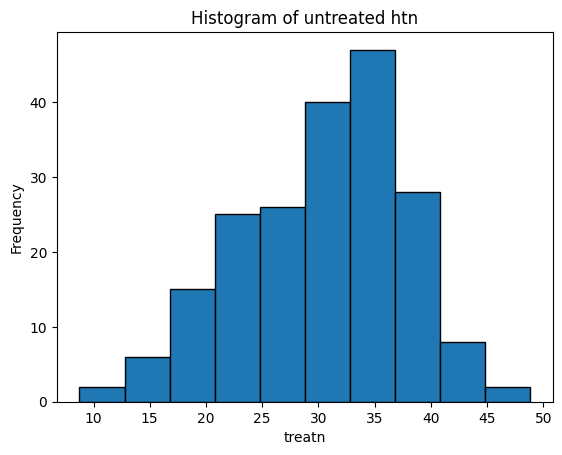

Index(['Country_x', 'Code', 'Sex_x', 'Year_x', 'htn', 'treat', 'control',
       'diagn', 'untreatedstage2HTN', 'Country_y', 'Income', 'pop', 'pop_tot',
       'Indicator_b', 'Country_b', 'Year_b', 'GeoRegion_b', 'nurse',
       'Indicator_c', 'Country_c', 'Year_c', 'GeoRegion_c', 'pharma',
       'Indicator_d', 'Country_d', 'Year_d', 'GeoRegion_d', 'chws_n',
       'Indicator_a', 'Country_a', 'Year_a', 'phy', 'chws', 'hw', 'treatn',
       'controln', 'diagng', 'htn2'],
      dtype='object')

In [214]:
df['treatn'] = df['treat']*df['htn']/100
df['controln'] = df['control']*df['htn']/100 #we should be using controln instead of control (ie percentage of hypertensives with controlled BP)
df['diagng'] = df['diagn']*df['htn']/100

#for visulation substract, control % from total height of each bar
df['htn2'] = df['htn']-df['controln']


plt.hist(df['htn2'], bins=10, edgecolor='black')
plt.title('Histogram of untreated htn')
plt.xlabel('treatn')
plt.ylabel('Frequency')
plt.show()


df.head(10)
df.columns

# df = df.sort_values(by=["Income","htn2"]).reset_index(drop=True)
# df.head()

In [215]:
df.columns

Index(['Country_x', 'Code', 'Sex_x', 'Year_x', 'htn', 'treat', 'control',
       'diagn', 'untreatedstage2HTN', 'Country_y', 'Income', 'pop', 'pop_tot',
       'Indicator_b', 'Country_b', 'Year_b', 'GeoRegion_b', 'nurse',
       'Indicator_c', 'Country_c', 'Year_c', 'GeoRegion_c', 'pharma',
       'Indicator_d', 'Country_d', 'Year_d', 'GeoRegion_d', 'chws_n',
       'Indicator_a', 'Country_a', 'Year_a', 'phy', 'chws', 'hw', 'treatn',
       'controln', 'diagng', 'htn2'],
      dtype='object')

In [216]:
#redefine merged_df as df
df.head(10)

#data on HWs
#physicians phy
#non physicians n_phy
df['n_phy']=df['nurse']+df['pharma']+df['chws']
    #nurses nurses
    #pharmacists pharma
    #Chws 
#all b_phy
df['b_phy']=df['hw']

#for simplicity, take roughtly 20% of population have at least one mental health disorders

df['pop_htn']=df['pop']*df['htn']/100

df.head(3)

#mental health demand
df['pop_htn_visit1']= df['pop_htn']*12
df['pop_htn_visit2']= df['pop_htn']*6
df['pop_htn_visit3']= df['pop_htn']*3

#mental health supply - workforce availability 

#Instance 1. Only physician provide mental health care 
#estimation scenario 1: one physician provide 20 consultation in a day
#one physician works 200 days a in year
df['phy_s1']=(df['phy']*df['pop']/10000)*200*20*0.1     #make sure that the unit of HF alings with what is using as a factor in the analysis /100000#

# estimation scenario 2: one physiciant provides 10 consulation in a day
#one physician works 200 days a in year
df['phy_s2']=(df['phy']*df['pop']/10000)*200*10*0.1  

#Instance 2. Only non physicians are provide mental health care (*nurses, pharmaciest, and cHWs are counted are non physicians here)
#estimation scenario 1: one non physician provides 20 consultation in a day
#one non physician works 200 days a in year
df['phy_s1_i1']=(df['n_phy']*df['pop']/10000)*200*20*0.1   # they can only give 10% of time in mental health care

# estimation scenario 2: one non physician provides 10 consulation in a day
#one non physician works 200 days a in year
df['phy_s2_i2']=(df['n_phy']*df['pop']/10000)*200*10*0.1  # they can only give 10% of time in mental health care

#Instance 3. Only both physician physicians are provide mental health care (*nurses, pharmaciest, and cHWs are counted are non physicians here)
#estimation scenario 1: these HWs provides 20 consultation in a day
#one HWs works 200 days a in year
df['phy_s1_c']=(df['b_phy']*df['pop']/10000)*200*20*0.1   # they can only give 10% of time in mental health care

# estimation scenario 2: HWs provides 10 consulation in a day
#one HWs works 200 days a in year
df['phy_s2_c']=(df['b_phy']*df['pop']/10000)*200*10*0.1  # they can only give 10% of time in mental health care



#gaps in HTN care
#base scenario 12 vitis a year
#physician only
df['gaps_hf_base_s1']=df['pop_htn_visit1'] - df['phy_s1'] #20 patients a day 

df['gaps_hf_base_s2']=df['pop_htn_visit1'] - df['phy_s2'] #10 patients a day 

#when non physcians are involved 
df['gaps_hf_base_s1_i1'] = df['pop_htn_visit1'] - df['phy_s1_i1'] #20 patients a day 

df['gaps_hf_base_s2_i2'] = df['pop_htn_visit1'] - df['phy_s2_i2'] #10 patients a day 

#when both physcians and non physicians are involved as well
df['gaps_hf_base_s1_c'] = df['pop_htn_visit1'] - df['phy_s1_c'] #20 patients a day 

df['gaps_hf_base_s2_c'] = df['pop_htn_visit1'] - df['phy_s2_c'] #10 patients a day 



#sensitivity analysis - physicians only - 6 or 3 visits a year
# S5 - 6 visits a year
df['gaps_hf_6_s1'] = df['pop_htn_visit2'] - df['phy_s1'] #20 patients a day 
df['gaps_hf_6_s2'] = df['pop_htn_visit2'] - df['phy_s2'] #10 patients a day 

# S6 - 3 visits a year
df['gaps_hf_3_s1'] = df['pop_htn_visit3'] - df['phy_s1'] #20 patients a day 
df['gaps_hf_3_s2'] = df['pop_htn_visit3'] - df['phy_s2'] #10 patients a day 



#sensitivity analysis - non physicians only
# S3- 6 visits a year
df['gaps_hf_6_s1_i1'] = df['pop_htn_visit2'] - df['phy_s1_i1'] #20 patients a day 
df['gaps_hf_6_s2_i2'] = df['pop_htn_visit2'] - df['phy_s2_i2'] #10 patients a day 

# S4 - 3 visits a year
df['gaps_hf_3_s1_i1'] = df['pop_htn_visit3'] - df['phy_s1_i1'] #20 patients a day 
df['gaps_hf_3_s2_i2'] = df['pop_htn_visit3'] - df['phy_s2_i2'] #10 patients a day 



#sensitivity analysis - both physicians and non physicians 
# S1 - 6 visits a year
df['gaps_hf_6_s1_c'] = df['pop_htn_visit2'] - df['phy_s1_c'] #20 patients a day 
df['gaps_hf_6_s2_c'] = df['pop_htn_visit2'] - df['phy_s2_c'] #10 patients a day 

# S2 - 3 visits a year
df['gaps_hf_3_s1_c'] = df['pop_htn_visit3'] - df['phy_s1_c'] #20 patients a day 
df['gaps_hf_3_s2_c'] = df['pop_htn_visit3'] - df['phy_s2_c'] #10 patients a day 


In [217]:
# df.columns

# df.to_csv('data_for_map.csv', index=False)
# df = pd.read_csv("./data_for_map.csv")
df.to_excel("hw.xlsx")

In [218]:
df.columns

# Calculate the sum of the 'pop' and 'pop_htn' columns
sum_pop = df['pop'].sum()
sum_pop_htn = df['pop_htn'].sum()
sum_pop_tot = df['pop_tot'].sum()

# Print the results
print(f"Total sum of 'pop': {sum_pop}")
print(f"Total sum of 'pop_htn': {sum_pop_htn}")
print(f"Total sum of 'pop_tot': {sum_pop_tot}")

Total sum of 'pop': 5512168200
Total sum of 'pop_htn': 1827461507.5898318
Total sum of 'pop_tot': 8027029400


4410202.85106 16287439.200000003 55520294.4856 157429473.02240005 3572302970.0800004
157429473
count    199.000000
mean       3.603015
std        1.286366
min        2.000000
25%        2.500000
50%        4.000000
75%        4.500000
max        6.000000
Name: gaps_cat4_base, dtype: float64
                Frequency  Relative Frequency  Percentage
gaps_cat4_base                                           
4                      50            0.251256   25.125628
2                      50            0.251256   25.125628
3                      49            0.246231   24.623116
5                      30            0.150754   15.075377
6                      20            0.100503   10.050251
4 16 56 157 3572


C:\Users\USER\AppData\Local\Temp\ipykernel_18608\2250207136.py:168: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  missing_data.plot(ax=ax, color='#66b3cc', hatch='///')


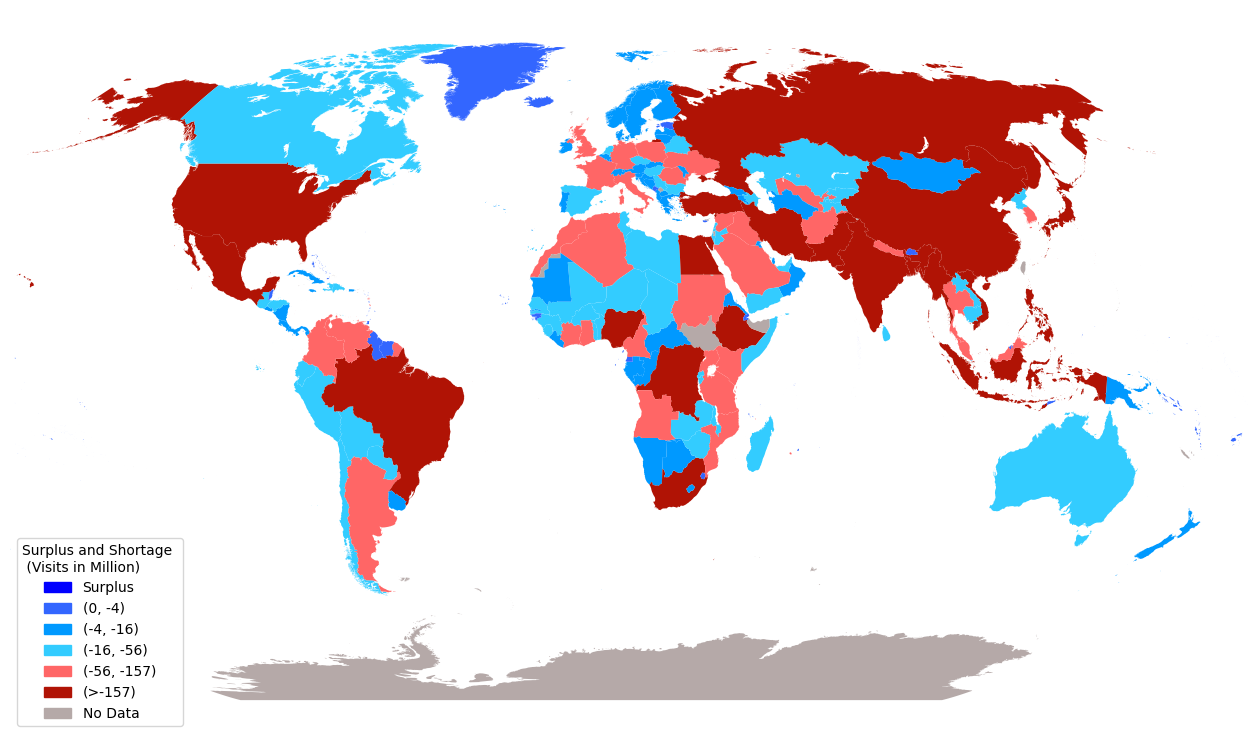

In [188]:
#########################################################################################
################################ 12 visits year #########################################
################################ Physician only #########################################
##################################### Img1 ##############################################
#########################################################################################

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from slugify import slugify
import matplotlib.patches as mpatches
import re

#########################################################################################
######## Calculate quartiles (Q1, Q2, Q3, Q4) for the 'gaps_base_s1' column #############
#########################################################################################
gaps_base_s1 = df['gaps_hf_base_s1']
Q1 = gaps_base_s1.quantile(0.25)
Q2 = gaps_base_s1.quantile(0.50)  # Median
Q3 = gaps_base_s1.quantile(0.75)
Q4 = gaps_base_s1.quantile(0.90)
Q5 = gaps_base_s1.max()

print(Q1, Q2, Q3, Q4, Q5)

# Define the cut-off values
cut_off_1 = 0
cut_off_2 = round(Q1)
cut_off_3 = round(Q2)
cut_off_4 = round(Q3)
cut_off_5 = round(Q4)
cut_off_6 = round(Q5)

print(cut_off_5)

# Function to categorize values based on cut-off points
def categorize_gaps(value):
    if value <= cut_off_1:
        return 1
    elif cut_off_1 < value <= cut_off_2:
            return 2
    elif cut_off_2 < value <= cut_off_3:
        return 3
    elif cut_off_3 < value <= cut_off_4:
        return 4
    elif cut_off_4 < value <= cut_off_5:
        return 5
    else:
        return 6

# Apply the function to the 'gaps_hf_6_s1' column
df['gaps_cat4_base'] = df['gaps_hf_base_s1'].apply(categorize_gaps)
df.head(10)

print(df['gaps_cat4_base'].describe(include='object'))

# Frequency counts
frequency_counts = df['gaps_cat4_base'].value_counts()

# Relative frequencies
relative_frequencies = df['gaps_cat4_base'].value_counts(normalize=True)

# Combining both into a DataFrame
summary_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'Relative Frequency': relative_frequencies,
    'Percentage': relative_frequencies * 100
})

# To view the summary DataFrame
print(summary_df)

df.columns

df.to_csv('data_for_map.csv', index=False)
df = pd.read_csv("./data_for_map.csv")
df.columns
# gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
# gdf.columns

######################################GIS GRAPHS################################################
################################################################################################
# Custom function to create a valid filename
def simple_slugify(value):
    # Remove special characters and replace spaces with hyphens
    value = re.sub(r'[^\w\s-]', '', value).strip().lower()  # Keep only word characters and spaces
    value = re.sub(r'[\s]+', '-', value)  # Replace spaces with hyphens
    return value

# Define parameters
figsize = (16, 10)
year = 'gaps_cat4_base'  # Use 'gaps_cat4_hf_6' as the variable name
title = ''
imgfile = 'img11/{}.png'.format(simple_slugify(title))
description = ''''''.strip()

# Load GeoDataFrame and data
gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
df = pd.read_csv("./data_for_map.csv")

# Assuming df is already renamed as:
df = df.rename(columns={"Country": "Country", "Code": "Country Code"})

gaps_hf_6_s1 = df['gaps_hf_base_s1']
t1 = gaps_hf_6_s1.quantile(0.25)
t2 = gaps_hf_6_s1.quantile(0.50)  # Median
t3 = gaps_hf_6_s1.quantile(0.75)
t4 = gaps_hf_6_s1.quantile(0.90)
t5 = gaps_hf_6_s1.max()

# 985594.1676 4076002.788 14268291.94875 35761464.534600034 910094182.4
# Define the cut-off values

Q1 = round(t1/1000000)
Q2  = round(t2/1000000)
Q3 = round(t3/1000000)
Q4  = round(t4/1000000)
Q5  = round(t5/1000000)

print(Q1, Q2, Q3, Q4, Q5)

# Perform a left join to include all rows from gdf (even if no match is found in df)
merged = gdf.merge(df, how='left', left_on='ADM0_A3', right_on='Country Code')

# Define the custom color categories for 'gaps_cat4_hf_6'
def assign_color(row):
    if  row[year] == 1:
        return 'Surplus'
    elif row[year] == 2:
        return f'(0, -{round(Q1)})'
    elif row[year] == 3:
        return f'(-{round(Q1)}, -{round(Q2)})'
    elif row[year] == 4:
        return f'(-{round(Q2)}, -{round(Q3)})'
    elif row[year] == 5:
        return f'(-{round(Q3)}, -{round(Q4)})'
    elif row[year] == 6:
        return f'(>-{round(Q4)})'
    else:
        return 'No Data'

# Create a new column 'category' with the assigned colors
merged['category'] = merged.apply(assign_color, axis=1)

# Define a color map for the categories
colors = {
    'Surplus': '#0000ff',  # Blue
    f'(0, -{round(Q1)})': '#3366ff',  # Blue
    f'(-{round(Q1)}, -{round(Q2)})': '#0099ff',  # Light blue
    f'(-{round(Q2)}, -{round(Q3)})': '#33ccff',  # Medium red
    f'(-{round(Q3)}, -{round(Q4)})': '#ff6666',  # Darker red
    f'(>-{round(Q4)})': '#b01305',  # Darkest red
    'No Data': '#b5a9a8'  # Black for missing data
}

# Map the colors to the merged GeoDataFrame
merged['color'] = merged['category'].map(colors)

# Plot
fig, ax = plt.subplots(figsize=figsize)

# Plot the data using the color mapping
merged.plot(ax=ax, color=merged['color'], legend=False)

# Highlight missing data with a hatch pattern
missing_data = merged[merged['category'] == 'No data']
missing_data.plot(ax=ax, color='#66b3cc', hatch='///')

# Set plot title and annotations
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

# Customize plot appearance
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])

# Create custom legend using the categories and their corresponding colors
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_patches, title="Surplus and Shortage \n (Visits in Million)", loc="lower left")

# Create the directory if it does not exist
os.makedirs(os.path.dirname(imgfile), exist_ok=True)

# Save the figure to a file
plt.savefig(imgfile, dpi=600, bbox_inches='tight')

# Show the figure
plt.show()


1035905.4255800002 9713394.5728 32788004.189698998 111670187.9240004 2478375328.623418
111670188
count    199.000000
mean       3.487437
std        1.452477
min        1.000000
25%        2.500000
50%        3.000000
75%        4.500000
max        6.000000
Name: gaps_cat4_base_s1_i1, dtype: float64
                      Frequency  Relative Frequency  Percentage
gaps_cat4_base_s1_i1                                           
3                            50            0.251256   25.125628
4                            49            0.246231   24.623116
5                            30            0.150754   15.075377
2                            28            0.140704   14.070352
1                            22            0.110553   11.055276
6                            20            0.100503   10.050251
1 10 33 112 2478


C:\Users\USER\AppData\Local\Temp\ipykernel_18608\3444471968.py:168: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  missing_data.plot(ax=ax, color='#66b3cc', hatch='///')


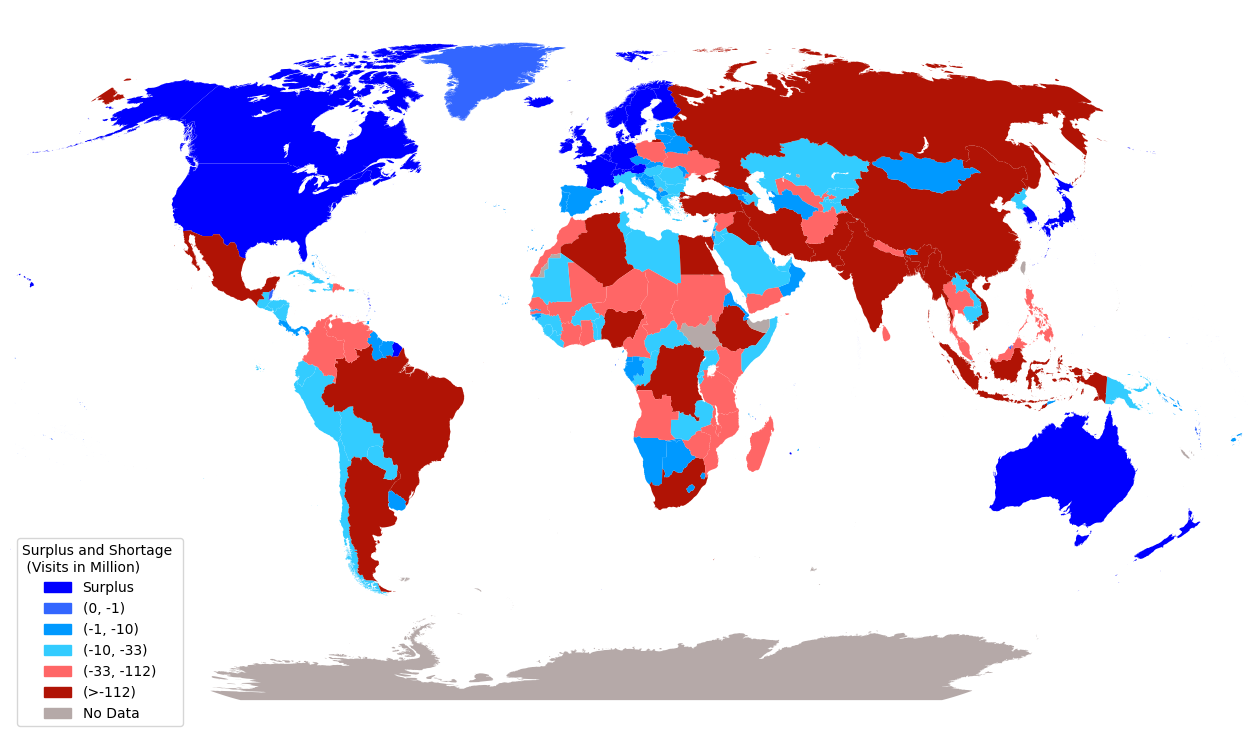

In [189]:
#########################################################################################
################################ 12 visits year #########################################
################################ Non Physician only #####################################
##################################### Img2 ##############################################
#########################################################################################

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from slugify import slugify
import matplotlib.patches as mpatches
import re

#########################################################################################
######## Calculate quartiles (Q1, Q2, Q3, Q4) for the 'gaps_base_s1' column #############
#########################################################################################
gaps_base_s1 = df['gaps_hf_base_s1_i1']
Q1 = gaps_base_s1.quantile(0.25)
Q2 = gaps_base_s1.quantile(0.50)  # Median
Q3 = gaps_base_s1.quantile(0.75)
Q4 = gaps_base_s1.quantile(0.90)
Q5 = gaps_base_s1.max()

print(Q1, Q2, Q3, Q4, Q5)

# Define the cut-off values
cut_off_1 = 0
cut_off_2 = round(Q1)
cut_off_3 = round(Q2)
cut_off_4 = round(Q3)
cut_off_5 = round(Q4)
cut_off_6 = round(Q5)

print(cut_off_5)

# Function to categorize values based on cut-off points
def categorize_gaps(value):
    if value <= cut_off_1:
        return 1
    elif cut_off_1 < value <= cut_off_2:
            return 2
    elif cut_off_2 < value <= cut_off_3:
        return 3
    elif cut_off_3 < value <= cut_off_4:
        return 4
    elif cut_off_4 < value <= cut_off_5:
        return 5
    else:
        return 6

# Apply the function to the 'gaps_hf_6_s1' column
df['gaps_cat4_base_s1_i1'] = df['gaps_hf_base_s1_i1'].apply(categorize_gaps)
df.head(10)

print(df['gaps_cat4_base_s1_i1'].describe(include='object'))

# Frequency counts
frequency_counts = df['gaps_cat4_base_s1_i1'].value_counts()

# Relative frequencies
relative_frequencies = df['gaps_cat4_base_s1_i1'].value_counts(normalize=True)

# Combining both into a DataFrame
summary_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'Relative Frequency': relative_frequencies,
    'Percentage': relative_frequencies * 100
})

# To view the summary DataFrame
print(summary_df)

df.columns

df.to_csv('data_for_map.csv', index=False)
df = pd.read_csv("./data_for_map.csv")
df.columns
# gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
# gdf.columns

######################################GIS GRAPHS################################################
################################################################################################
# Custom function to create a valid filename
def simple_slugify(value):
    # Remove special characters and replace spaces with hyphens
    value = re.sub(r'[^\w\s-]', '', value).strip().lower()  # Keep only word characters and spaces
    value = re.sub(r'[\s]+', '-', value)  # Replace spaces with hyphens
    return value

# Define parameters
figsize = (16, 10)
year = 'gaps_cat4_base_s1_i1'  # Use 'gaps_cat4_hf_6' as the variable name
title = ''
imgfile = 'img22/{}.png'.format(simple_slugify(title))
description = ''''''.strip()

# Load GeoDataFrame and data
gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
df = pd.read_csv("./data_for_map.csv")

# Assuming df is already renamed as:
df = df.rename(columns={"Country": "Country", "Code": "Country Code"})

gaps_hf_6_s1 = df['gaps_hf_base_s1_i1']
t1 = gaps_hf_6_s1.quantile(0.25)
t2 = gaps_hf_6_s1.quantile(0.50)  # Median
t3 = gaps_hf_6_s1.quantile(0.75)
t4 = gaps_hf_6_s1.quantile(0.90)
t5 = gaps_hf_6_s1.max()

# 985594.1676 4076002.788 14268291.94875 35761464.534600034 910094182.4
# Define the cut-off values

Q1 = round(t1/1000000)
Q2  = round(t2/1000000)
Q3 = round(t3/1000000)
Q4  = round(t4/1000000)
Q5  = round(t5/1000000)

print(Q1, Q2, Q3, Q4, Q5)

# Perform a left join to include all rows from gdf (even if no match is found in df)
merged = gdf.merge(df, how='left', left_on='ADM0_A3', right_on='Country Code')

# Define the custom color categories for 'gaps_cat4_hf_6'
def assign_color(row):
    if  row[year] == 1:
        return 'Surplus'
    elif row[year] == 2:
        return f'(0, -{round(Q1)})'
    elif row[year] == 3:
        return f'(-{round(Q1)}, -{round(Q2)})'
    elif row[year] == 4:
        return f'(-{round(Q2)}, -{round(Q3)})'
    elif row[year] == 5:
        return f'(-{round(Q3)}, -{round(Q4)})'
    elif row[year] == 6:
        return f'(>-{round(Q4)})'
    else:
        return 'No Data'

# Create a new column 'category' with the assigned colors
merged['category'] = merged.apply(assign_color, axis=1)

# Define a color map for the categories
colors = {
    'Surplus': '#0000ff',  # Blue
    f'(0, -{round(Q1)})': '#3366ff',  # Blue
    f'(-{round(Q1)}, -{round(Q2)})': '#0099ff',  # Light blue
    f'(-{round(Q2)}, -{round(Q3)})': '#33ccff',  # Medium red
    f'(-{round(Q3)}, -{round(Q4)})': '#ff6666',  # Darker red
    f'(>-{round(Q4)})': '#b01305',  # Darkest red
    'No Data': '#b5a9a8'  # Black for missing data
}

# Map the colors to the merged GeoDataFrame
merged['color'] = merged['category'].map(colors)

# Plot
fig, ax = plt.subplots(figsize=figsize)

# Plot the data using the color mapping
merged.plot(ax=ax, color=merged['color'], legend=False)

# Highlight missing data with a hatch pattern
missing_data = merged[merged['category'] == 'No data']
missing_data.plot(ax=ax, color='#66b3cc', hatch='///')

# Set plot title and annotations
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

# Customize plot appearance
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])

# Create custom legend using the categories and their corresponding colors
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_patches, title="Surplus and Shortage \n (Visits in Million)", loc="lower left")

# Create the directory if it does not exist
os.makedirs(os.path.dirname(imgfile), exist_ok=True)

# Save the figure to a file
plt.savefig(imgfile, dpi=600, bbox_inches='tight')

# Show the figure
plt.show()

1709941.0112485709 10144003.81957575 41362445.60179356 105756397.724529 2175943328.6234174
105756398
count    199.000000
mean       3.130653
std        1.541682
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: gaps_cat4_base_s1_c, dtype: float64
                     Frequency  Relative Frequency  Percentage
gaps_cat4_base_s1_c                                           
3                           41            0.206030   20.603015
2                           41            0.206030   20.603015
4                           40            0.201005   20.100503
1                           36            0.180905   18.090452
5                           24            0.120603   12.060302
6                           17            0.085427    8.542714
2 10 41 106 2176


C:\Users\USER\AppData\Local\Temp\ipykernel_18608\1726515831.py:168: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  missing_data.plot(ax=ax, color='#66b3cc', hatch='///')


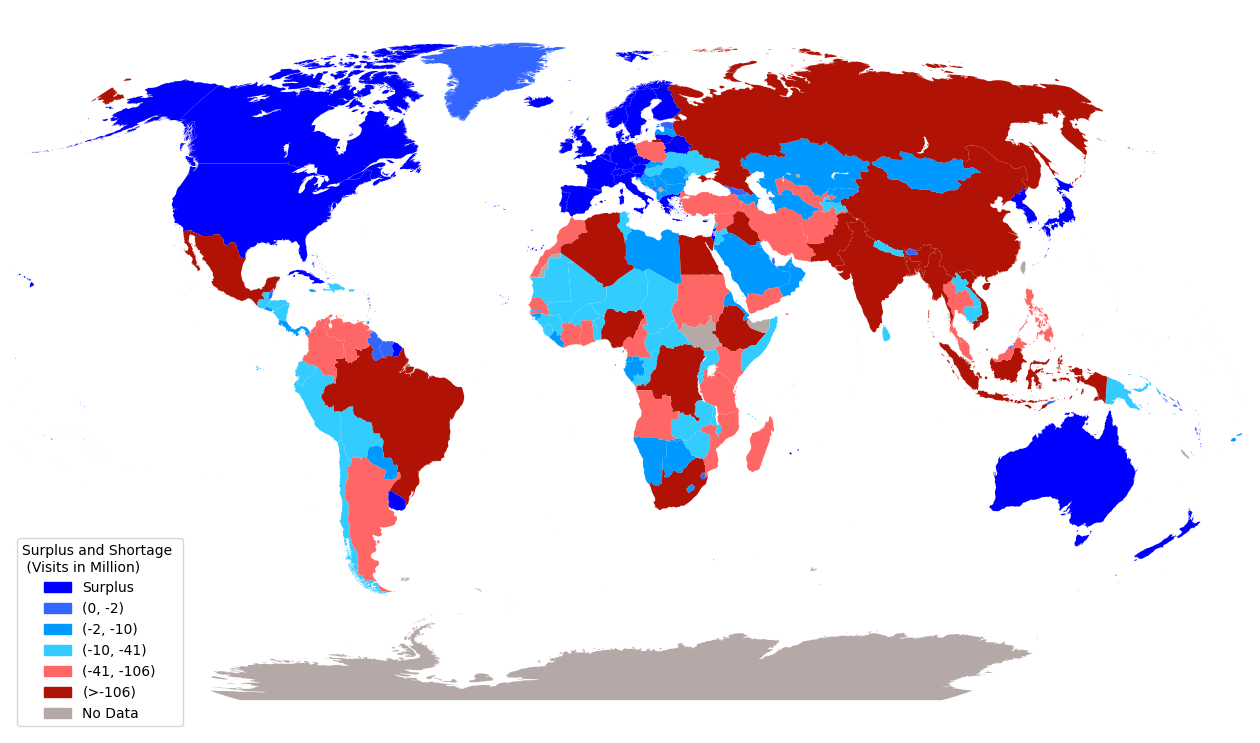

In [223]:
#########################################################################################
################################ 12 visits year #########################################
####################### Both physician and Physician only ###############################
##################################### Img3 ##############################################
#########################################################################################

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from slugify import slugify
import matplotlib.patches as mpatches
import re

#########################################################################################
######## Calculate quartiles (Q1, Q2, Q3, Q4) for the 'gaps_base_s1' column #############
#########################################################################################
gaps_base_s1 = df[df['gaps_hf_base_s1_c']>0]
Q1 = gaps_base_s1['gaps_hf_base_s1_c'].quantile(0.25)
Q2 = gaps_base_s1['gaps_hf_base_s1_c'].quantile(0.50)  # Median
Q3 = gaps_base_s1['gaps_hf_base_s1_c'].quantile(0.75)
Q4 = gaps_base_s1['gaps_hf_base_s1_c'].quantile(0.90)
Q5 = gaps_base_s1['gaps_hf_base_s1_c'].max()

print(Q1, Q2, Q3, Q4, Q5)

# Define the cut-off values
cut_off_1 = 0
cut_off_2 = round(Q1)
cut_off_3 = round(Q2)
cut_off_4 = round(Q3)
cut_off_5 = round(Q4)
cut_off_6 = round(Q5)

print(cut_off_5)

# Function to categorize values based on cut-off points
def categorize_gaps(value):
    if value <= cut_off_1:
        return 1
    elif cut_off_1 < value <= cut_off_2:
            return 2
    elif cut_off_2 < value <= cut_off_3:
        return 3
    elif cut_off_3 < value <= cut_off_4:
        return 4
    elif cut_off_4 < value <= cut_off_5:
        return 5
    else:
        return 6

# Apply the function to the 'gaps_hf_6_s1' column
df['gaps_cat4_base_s1_c'] = df['gaps_hf_base_s1_c'].apply(categorize_gaps)
df.head(10)

print(df['gaps_cat4_base_s1_c'].describe(include='object'))

# Frequency counts
frequency_counts = df['gaps_cat4_base_s1_c'].value_counts()

# Relative frequencies
relative_frequencies = df['gaps_cat4_base_s1_c'].value_counts(normalize=True)

# Combining both into a DataFrame
summary_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'Relative Frequency': relative_frequencies,
    'Percentage': relative_frequencies * 100
})

# To view the summary DataFrame
print(summary_df)

df.columns

df.to_csv('data_for_map.csv', index=False)
df = pd.read_csv("./data_for_map.csv")
df.columns
# gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
# gdf.columns

######################################GIS GRAPHS################################################
################################################################################################
# Custom function to create a valid filename
def simple_slugify(value):
    # Remove special characters and replace spaces with hyphens
    value = re.sub(r'[^\w\s-]', '', value).strip().lower()  # Keep only word characters and spaces
    value = re.sub(r'[\s]+', '-', value)  # Replace spaces with hyphens
    return value

# Define parameters
figsize = (16, 10)
year = 'gaps_cat4_base_s1_c'  # Use 'gaps_cat4_hf_6' as the variable name
title = ''
imgfile = 'img33/{}.png'.format(simple_slugify(title))
description = ''''''.strip()

# Load GeoDataFrame and data
gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
df = pd.read_csv("./data_for_map.csv")

# Assuming df is already renamed as:
df = df.rename(columns={"Country": "Country", "Code": "Country Code"})

gaps_hf_6_s1 = df[df['gaps_hf_base_s1_c']>0]
t1 = gaps_hf_6_s1['gaps_hf_base_s1_c'].quantile(0.25)
t2 = gaps_hf_6_s1['gaps_hf_base_s1_c'].quantile(0.50)  # Median
t3 = gaps_hf_6_s1['gaps_hf_base_s1_c'].quantile(0.75)
t4 = gaps_hf_6_s1['gaps_hf_base_s1_c'].quantile(0.90)
t5 = gaps_hf_6_s1['gaps_hf_base_s1_c'].max()

# 985594.1676 4076002.788 14268291.94875 35761464.534600034 910094182.4
# Define the cut-off values

Q1 = round(t1/1000000)
Q2  = round(t2/1000000)
Q3 = round(t3/1000000)
Q4  = round(t4/1000000)
Q5  = round(t5/1000000)

print(Q1, Q2, Q3, Q4, Q5)

# Perform a left join to include all rows from gdf (even if no match is found in df)
merged = gdf.merge(df, how='left', left_on='ADM0_A3', right_on='Country Code')

# Define the custom color categories for 'gaps_cat4_hf_6'
def assign_color(row):
    if  row[year] == 1:
        return 'Surplus'
    elif row[year] == 2:
        return f'(0, -{round(Q1,2)})'
    elif row[year] == 3:
        return f'(-{round(Q1,2)}, -{round(Q2)})'
    elif row[year] == 4:
        return f'(-{round(Q2)}, -{round(Q3)})'
    elif row[year] == 5:
        return f'(-{round(Q3)}, -{round(Q4)})'
    elif row[year] == 6:
        return f'(>-{round(Q4)})'
    else:
        return 'No Data'

# Create a new column 'category' with the assigned colors
merged['category'] = merged.apply(assign_color, axis=1)

# Define a color map for the categories
colors = {
    'Surplus': '#0000ff',  # Blue
    f'(0, -{round(Q1,2)})': '#3366ff',  # Blue
    f'(-{round(Q1,2)}, -{round(Q2)})': '#0099ff',  # Light blue
    f'(-{round(Q2)}, -{round(Q3)})': '#33ccff',  # Medium red
    f'(-{round(Q3)}, -{round(Q4)})': '#ff6666',  # Darker red
    f'(>-{round(Q4)})': '#b01305',  # Darkest red
    'No Data': '#b5a9a8'  # Black for missing data
}

# Map the colors to the merged GeoDataFrame
merged['color'] = merged['category'].map(colors)

# Plot
fig, ax = plt.subplots(figsize=figsize)

# Plot the data using the color mapping
merged.plot(ax=ax, color=merged['color'], legend=False)

# Highlight missing data with a hatch pattern
missing_data = merged[merged['category'] == 'No data']
missing_data.plot(ax=ax, color='#66b3cc', hatch='///')

# Set plot title and annotations
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

# Customize plot appearance
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])

# Create custom legend using the categories and their corresponding colors
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_patches, title="Surplus and Shortage \n (Visits in Million)", loc="lower left")

# Create the directory if it does not exist
os.makedirs(os.path.dirname(imgfile), exist_ok=True)

# Save the figure to a file
plt.savefig(imgfile, dpi=600, bbox_inches='tight')

# Show the figure
plt.show()


1431454.0459 6799523.8149 23553100.482349996 70359686.18800004 1634935485.0400002
70359686
count    199.000000
mean       3.442211
std        1.394588
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: gaps_cat4_6_s1, dtype: float64
                Frequency  Relative Frequency  Percentage
gaps_cat4_6_s1                                           
3                      47            0.236181   23.618090
2                      47            0.236181   23.618090
4                      46            0.231156   23.115578
5                      28            0.140704   14.070352
6                      19            0.095477    9.547739
1                      12            0.060302    6.030151
1 7 24 70 1635


C:\Users\USER\AppData\Local\Temp\ipykernel_18608\293367727.py:168: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  missing_data.plot(ax=ax, color='#66b3cc', hatch='///')


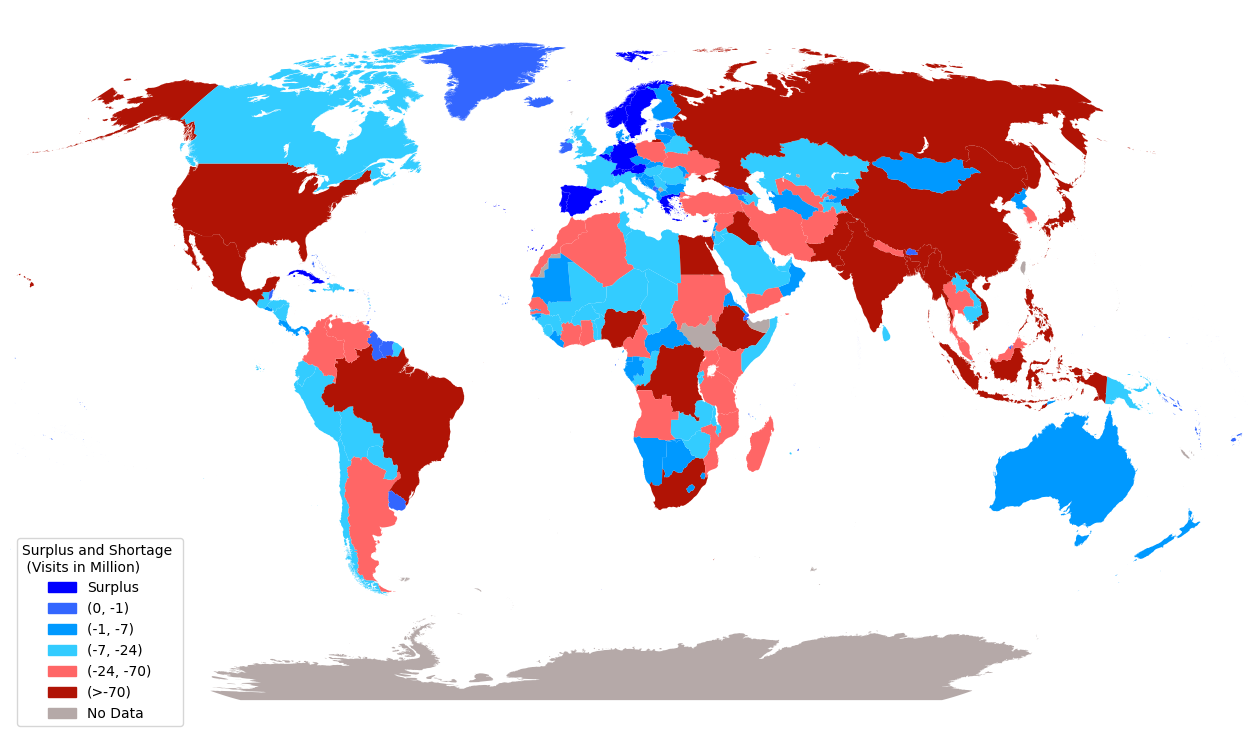

In [191]:
#########################################################################################
################################ 6 visits year ##########################################
################################ Physician only #########################################
##################################### Img4 ##############################################
#########################################################################################

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from slugify import slugify
import matplotlib.patches as mpatches
import re

#########################################################################################
######## Calculate quartiles (Q1, Q2, Q3, Q4) for the 'gaps_base_s1' column #############
#########################################################################################
gaps_base_s1 = df[df['gaps_hf_6_s1']>0]
Q1 = gaps_base_s1['gaps_hf_6_s1'].quantile(0.25)
Q2 = gaps_base_s1['gaps_hf_6_s1'].quantile(0.50)  # Median
Q3 = gaps_base_s1['gaps_hf_6_s1'].quantile(0.75)
Q4 = gaps_base_s1['gaps_hf_6_s1'].quantile(0.90)
Q5 = gaps_base_s1['gaps_hf_6_s1'].max()

print(Q1, Q2, Q3, Q4, Q5)

# Define the cut-off values
cut_off_1 = 0
cut_off_2 = round(Q1)
cut_off_3 = round(Q2)
cut_off_4 = round(Q3)
cut_off_5 = round(Q4)
cut_off_6 = round(Q5)

print(cut_off_5)

# Function to categorize values based on cut-off points
def categorize_gaps(value):
    if value <= cut_off_1:
        return 1
    elif cut_off_1 < value <= cut_off_2:
            return 2
    elif cut_off_2 < value <= cut_off_3:
        return 3
    elif cut_off_3 < value <= cut_off_4:
        return 4
    elif cut_off_4 < value <= cut_off_5:
        return 5
    else:
        return 6

# Apply the function to the 'gaps_hf_6_s1' column
df['gaps_cat4_6_s1'] = df['gaps_hf_6_s1'].apply(categorize_gaps)
df.head(10)

print(df['gaps_cat4_6_s1'].describe(include='object'))

# Frequency counts
frequency_counts = df['gaps_cat4_6_s1'].value_counts()

# Relative frequencies
relative_frequencies = df['gaps_cat4_6_s1'].value_counts(normalize=True)

# Combining both into a DataFrame
summary_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'Relative Frequency': relative_frequencies,
    'Percentage': relative_frequencies * 100
})

# To view the summary DataFrame
print(summary_df)

df.columns

df.to_csv('data_for_map.csv', index=False)
df = pd.read_csv("./data_for_map.csv")
df.columns
# gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
# gdf.columns

######################################GIS GRAPHS################################################
################################################################################################
# Custom function to create a valid filename
def simple_slugify(value):
    # Remove special characters and replace spaces with hyphens
    value = re.sub(r'[^\w\s-]', '', value).strip().lower()  # Keep only word characters and spaces
    value = re.sub(r'[\s]+', '-', value)  # Replace spaces with hyphens
    return value

# Define parameters
figsize = (16, 10)
year = 'gaps_cat4_6_s1'  # Use 'gaps_cat4_hf_6' as the variable name
title = ''
imgfile = 'img44/{}.png'.format(simple_slugify(title))
description = ''''''.strip()

# Load GeoDataFrame and data
gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
df = pd.read_csv("./data_for_map.csv")

# Assuming df is already renamed as:
df = df.rename(columns={"Country": "Country", "Code": "Country Code"})

gaps_hf_6_s1 = df[df['gaps_hf_6_s1']>0]
t1 = gaps_hf_6_s1['gaps_hf_6_s1'].quantile(0.25)
t2 = gaps_hf_6_s1['gaps_hf_6_s1'].quantile(0.50)  # Median
t3 = gaps_hf_6_s1['gaps_hf_6_s1'].quantile(0.75)
t4 = gaps_hf_6_s1['gaps_hf_6_s1'].quantile(0.90)
t5 = gaps_hf_6_s1['gaps_hf_6_s1'].max()

# 985594.1676 4076002.788 14268291.94875 35761464.534600034 910094182.4
# Define the cut-off values

Q1 = round(t1/1000000)
Q2  = round(t2/1000000)
Q3 = round(t3/1000000)
Q4  = round(t4/1000000)
Q5  = round(t5/1000000)

print(Q1, Q2, Q3, Q4, Q5)

# Perform a left join to include all rows from gdf (even if no match is found in df)
merged = gdf.merge(df, how='left', left_on='ADM0_A3', right_on='Country Code')

# Define the custom color categories for 'gaps_cat4_hf_6'
def assign_color(row):
    if  row[year] == 1:
        return 'Surplus'
    elif row[year] == 2:
        return f'(0, -{round(Q1)})'
    elif row[year] == 3:
        return f'(-{round(Q1)}, -{round(Q2)})'
    elif row[year] == 4:
        return f'(-{round(Q2)}, -{round(Q3)})'
    elif row[year] == 5:
        return f'(-{round(Q3)}, -{round(Q4)})'
    elif row[year] == 6:
        return f'(>-{round(Q4)})'
    else:
        return 'No Data'

# Create a new column 'category' with the assigned colors
merged['category'] = merged.apply(assign_color, axis=1)

# Define a color map for the categories
colors = {
    'Surplus': '#0000ff',  # Blue
    f'(0, -{round(Q1)})': '#3366ff',  # Blue
    f'(-{round(Q1)}, -{round(Q2)})': '#0099ff',  # Light blue
    f'(-{round(Q2)}, -{round(Q3)})': '#33ccff',  # Medium red
    f'(-{round(Q3)}, -{round(Q4)})': '#ff6666',  # Darker red
    f'(>-{round(Q4)})': '#b01305',  # Darkest red
    'No Data': '#b5a9a8'  # Black for missing data
}

# Map the colors to the merged GeoDataFrame
merged['color'] = merged['category'].map(colors)

# Plot
fig, ax = plt.subplots(figsize=figsize)

# Plot the data using the color mapping
merged.plot(ax=ax, color=merged['color'], legend=False)

# Highlight missing data with a hatch pattern
missing_data = merged[merged['category'] == 'No data']
missing_data.plot(ax=ax, color='#66b3cc', hatch='///')

# Set plot title and annotations
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

# Customize plot appearance
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])

# Create custom legend using the categories and their corresponding colors
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_patches, title="Surplus and Shortage \n (Visits in Million)", loc="lower left")

# Create the directory if it does not exist
os.makedirs(os.path.dirname(imgfile), exist_ok=True)

# Save the figure to a file
plt.savefig(imgfile, dpi=600, bbox_inches='tight')

# Show the figure
plt.show()


745731.9715285711 4608210.92 18284379.725332603 42128436.56 541007843.5834174
42128437
count    199.000000
mean       2.708543
std        1.616042
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        6.000000
Name: gaps_cat4_6_s1_i1, dtype: float64
                   Frequency  Relative Frequency  Percentage
gaps_cat4_6_s1_i1                                           
1                         68            0.341709   34.170854
3                         33            0.165829   16.582915
2                         33            0.165829   16.582915
4                         32            0.160804   16.080402
5                         20            0.100503   10.050251
6                         13            0.065327    6.532663
1 5 18 42 541


C:\Users\USER\AppData\Local\Temp\ipykernel_18608\3604754277.py:168: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  missing_data.plot(ax=ax, color='#66b3cc', hatch='///')


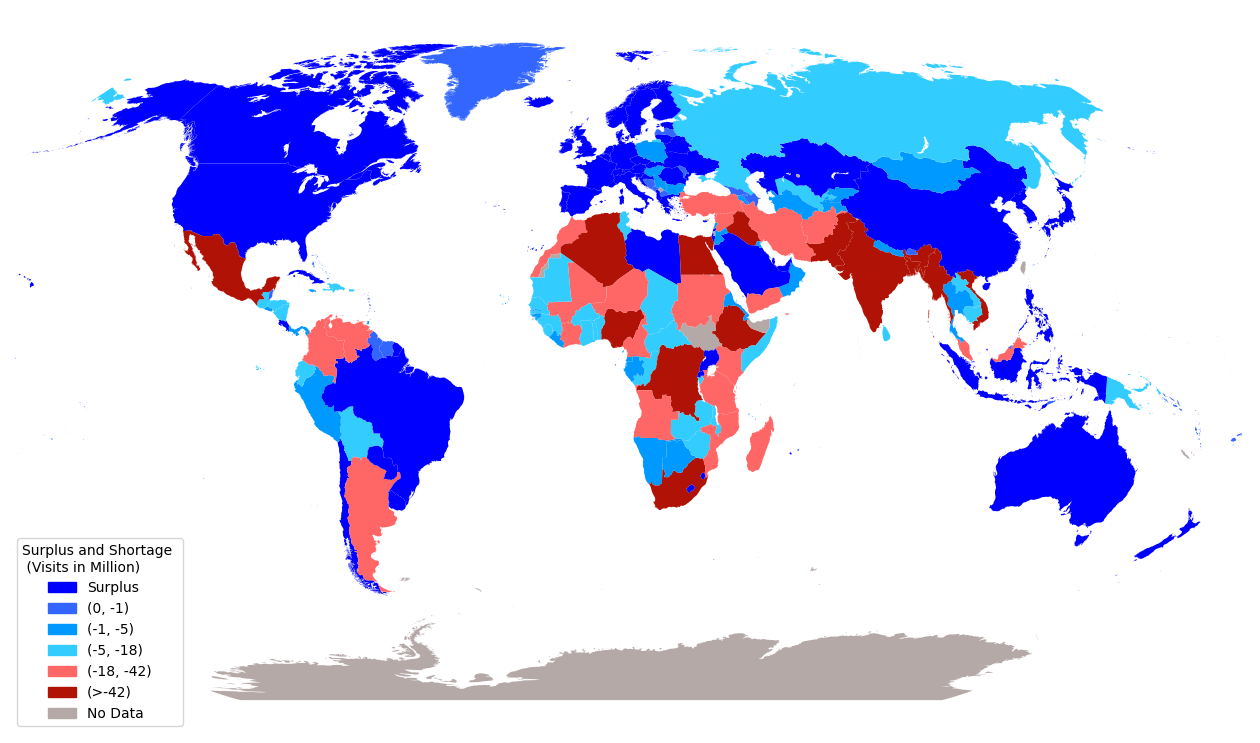

In [192]:
#########################################################################################
################################ 6 visits year ##########################################
################################ Non Physician only #####################################
##################################### Img5 ##############################################
#########################################################################################

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from slugify import slugify
import matplotlib.patches as mpatches
import re

#########################################################################################
######## Calculate quartiles (Q1, Q2, Q3, Q4) for the 'gaps_base_s1' column #############
#########################################################################################
gaps_base_s1 = df[df['gaps_hf_6_s1_i1']>0]
Q1 = gaps_base_s1['gaps_hf_6_s1_i1'].quantile(0.25)
Q2 = gaps_base_s1['gaps_hf_6_s1_i1'].quantile(0.50)  # Median
Q3 = gaps_base_s1['gaps_hf_6_s1_i1'].quantile(0.75)
Q4 = gaps_base_s1['gaps_hf_6_s1_i1'].quantile(0.90)
Q5 = gaps_base_s1['gaps_hf_6_s1_i1'].max()

print(Q1, Q2, Q3, Q4, Q5)

# Define the cut-off values
cut_off_1 = 0
cut_off_2 = round(Q1)
cut_off_3 = round(Q2)
cut_off_4 = round(Q3)
cut_off_5 = round(Q4)
cut_off_6 = round(Q5)

print(cut_off_5)

# Function to categorize values based on cut-off points
def categorize_gaps(value):
    if value <= cut_off_1:
        return 1
    elif cut_off_1 < value <= cut_off_2:
            return 2
    elif cut_off_2 < value <= cut_off_3:
        return 3
    elif cut_off_3 < value <= cut_off_4:
        return 4
    elif cut_off_4 < value <= cut_off_5:
        return 5
    else:
        return 6

# Apply the function to the 'gaps_hf_6_s1' column
df['gaps_cat4_6_s1_i1'] = df['gaps_hf_6_s1_i1'].apply(categorize_gaps)
df.head(10)

print(df['gaps_cat4_6_s1_i1'].describe(include='object'))

# Frequency counts
frequency_counts = df['gaps_cat4_6_s1_i1'].value_counts()

# Relative frequencies
relative_frequencies = df['gaps_cat4_6_s1_i1'].value_counts(normalize=True)

# Combining both into a DataFrame
summary_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'Relative Frequency': relative_frequencies,
    'Percentage': relative_frequencies * 100
})

# To view the summary DataFrame
print(summary_df)

df.columns

df.to_csv('data_for_map.csv', index=False)
df = pd.read_csv("./data_for_map.csv")
df.columns
# gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
# gdf.columns

######################################GIS GRAPHS################################################
################################################################################################
# Custom function to create a valid filename
def simple_slugify(value):
    # Remove special characters and replace spaces with hyphens
    value = re.sub(r'[^\w\s-]', '', value).strip().lower()  # Keep only word characters and spaces
    value = re.sub(r'[\s]+', '-', value)  # Replace spaces with hyphens
    return value

# Define parameters
figsize = (16, 10)
year = 'gaps_cat4_6_s1_i1'  # Use 'gaps_cat4_hf_6' as the variable name
title = ''
imgfile = 'img55/{}.png'.format(simple_slugify(title))
description = ''''''.strip()

# Load GeoDataFrame and data
gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
df = pd.read_csv("./data_for_map.csv")

# Assuming df is already renamed as:
df = df.rename(columns={"Country": "Country", "Code": "Country Code"})

gaps_hf_6_s1 = df[df['gaps_hf_6_s1_i1']>0]
t1 = gaps_hf_6_s1['gaps_hf_6_s1_i1'].quantile(0.25)
t2 = gaps_hf_6_s1['gaps_hf_6_s1_i1'].quantile(0.50)  # Median
t3 = gaps_hf_6_s1['gaps_hf_6_s1_i1'].quantile(0.75)
t4 = gaps_hf_6_s1['gaps_hf_6_s1_i1'].quantile(0.90)
t5 = gaps_hf_6_s1['gaps_hf_6_s1_i1'].max()

# 985594.1676 4076002.788 14268291.94875 35761464.534600034 910094182.4
# Define the cut-off values

Q1 = round(t1/1000000)
Q2  = round(t2/1000000)
Q3 = round(t3/1000000)
Q4  = round(t4/1000000)
Q5  = round(t5/1000000)

print(Q1, Q2, Q3, Q4, Q5)

# Perform a left join to include all rows from gdf (even if no match is found in df)
merged = gdf.merge(df, how='left', left_on='ADM0_A3', right_on='Country Code')

# Define the custom color categories for 'gaps_cat4_hf_6'
def assign_color(row):
    if  row[year] == 1:
        return 'Surplus'
    elif row[year] == 2:
        return f'(0, -{round(Q1)})'
    elif row[year] == 3:
        return f'(-{round(Q1)}, -{round(Q2)})'
    elif row[year] == 4:
        return f'(-{round(Q2)}, -{round(Q3)})'
    elif row[year] == 5:
        return f'(-{round(Q3)}, -{round(Q4)})'
    elif row[year] == 6:
        return f'(>-{round(Q4)})'
    else:
        return 'No Data'

# Create a new column 'category' with the assigned colors
merged['category'] = merged.apply(assign_color, axis=1)

# Define a color map for the categories
colors = {
    'Surplus': '#0000ff',  # Blue
    f'(0, -{round(Q1)})': '#3366ff',  # Blue
    f'(-{round(Q1)}, -{round(Q2)})': '#0099ff',  # Light blue
    f'(-{round(Q2)}, -{round(Q3)})': '#33ccff',  # Medium red
    f'(-{round(Q3)}, -{round(Q4)})': '#ff6666',  # Darker red
    f'(>-{round(Q4)})': '#b01305',  # Darkest red
    'No Data': '#b5a9a8'  # Black for missing data
}

# Map the colors to the merged GeoDataFrame
merged['color'] = merged['category'].map(colors)

# Plot
fig, ax = plt.subplots(figsize=figsize)

# Plot the data using the color mapping
merged.plot(ax=ax, color=merged['color'], legend=False)

# Highlight missing data with a hatch pattern
missing_data = merged[merged['category'] == 'No data']
missing_data.plot(ax=ax, color='#66b3cc', hatch='///')

# Set plot title and annotations
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

# Customize plot appearance
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])

# Create custom legend using the categories and their corresponding colors
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_patches, title="Surplus and Shortage \n (Visits in Million)", loc="lower left")

# Create the directory if it does not exist
os.makedirs(os.path.dirname(imgfile), exist_ok=True)

# Save the figure to a file
plt.savefig(imgfile, dpi=600, bbox_inches='tight')

# Show the figure
plt.show()


1009076.8366832142 6666052.088080769 18973530.224696428 53763992.36536672 329100796.61403847
53763992
count    199.000000
mean       2.175879
std        1.561604
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        6.000000
Name: gaps_cat4_6_s1_c, dtype: float64
                  Frequency  Relative Frequency  Percentage
gaps_cat4_6_s1_c                                           
1                       109            0.547739   54.773869
2                        23            0.115578   11.557789
4                        22            0.110553   11.055276
3                        22            0.110553   11.055276
5                        14            0.070352    7.035176
6                         9            0.045226    4.522613
1 7 19 54 329


C:\Users\USER\AppData\Local\Temp\ipykernel_18608\3784692857.py:168: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  missing_data.plot(ax=ax, color='#66b3cc', hatch='///')


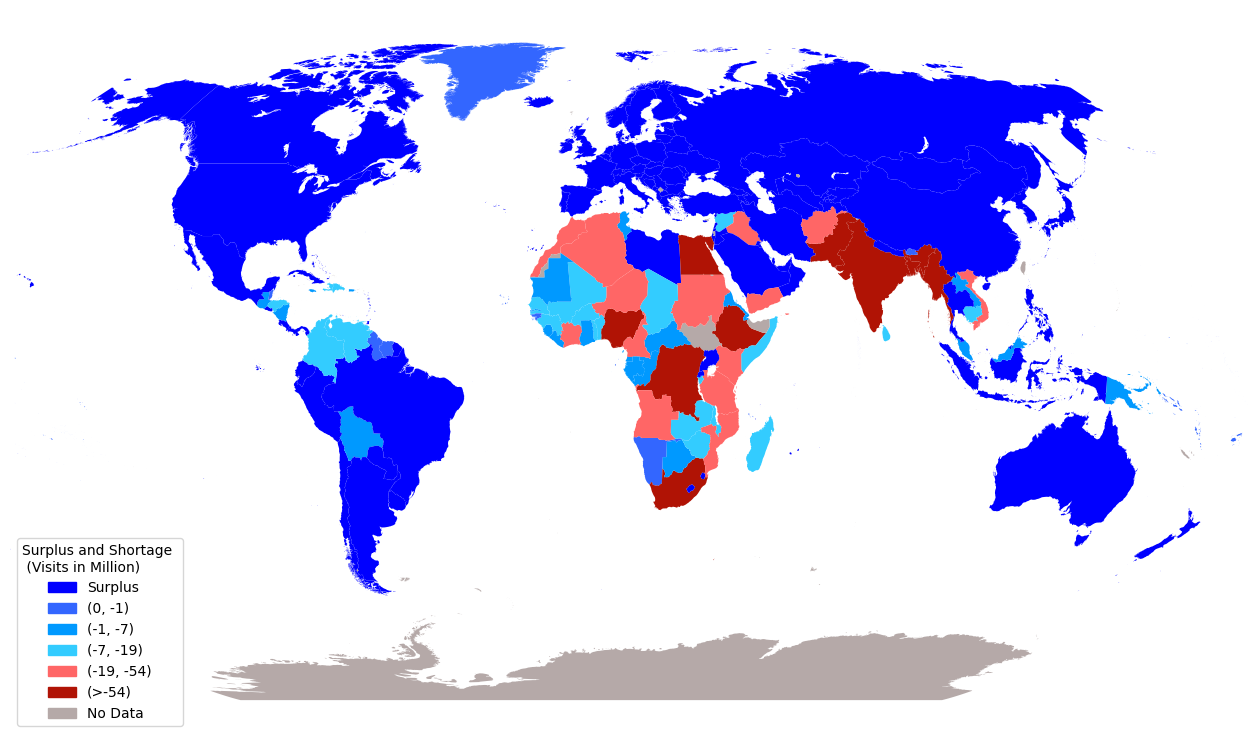

In [193]:
#########################################################################################
################################ 6 visits year ##########################################
######################## Physician and non Physician only ###############################
##################################### Img6 ##############################################
#########################################################################################

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from slugify import slugify
import matplotlib.patches as mpatches
import re

#########################################################################################
######## Calculate quartiles (Q1, Q2, Q3, Q4) for the 'gaps_base_s1' column #############
#########################################################################################
gaps_base_s1 = df[df['gaps_hf_6_s1_c']>0]
Q1 = gaps_base_s1['gaps_hf_6_s1_c'].quantile(0.25)
Q2 = gaps_base_s1['gaps_hf_6_s1_c'].quantile(0.50)  # Median
Q3 = gaps_base_s1['gaps_hf_6_s1_c'].quantile(0.75)
Q4 = gaps_base_s1['gaps_hf_6_s1_c'].quantile(0.90)
Q5 = gaps_base_s1['gaps_hf_6_s1_c'].max()

print(Q1, Q2, Q3, Q4, Q5)

# Define the cut-off values
cut_off_1 = 0
cut_off_2 = round(Q1)
cut_off_3 = round(Q2)
cut_off_4 = round(Q3)
cut_off_5 = round(Q4)
cut_off_6 = round(Q5)

print(cut_off_5)

# Function to categorize values based on cut-off points
def categorize_gaps(value):
    if value <= cut_off_1:
        return 1
    elif cut_off_1 < value <= cut_off_2:
            return 2
    elif cut_off_2 < value <= cut_off_3:
        return 3
    elif cut_off_3 < value <= cut_off_4:
        return 4
    elif cut_off_4 < value <= cut_off_5:
        return 5
    else:
        return 6

# Apply the function to the 'gaps_hf_6_s1' column
df['gaps_cat4_6_s1_c'] = df['gaps_hf_6_s1_c'].apply(categorize_gaps)
df.head(10)

print(df['gaps_cat4_6_s1_c'].describe(include='object'))

# Frequency counts
frequency_counts = df['gaps_cat4_6_s1_c'].value_counts()

# Relative frequencies
relative_frequencies = df['gaps_cat4_6_s1_c'].value_counts(normalize=True)

# Combining both into a DataFrame
summary_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'Relative Frequency': relative_frequencies,
    'Percentage': relative_frequencies * 100
})

# To view the summary DataFrame
print(summary_df)

df.columns

df.to_csv('data_for_map.csv', index=False)
df = pd.read_csv("./data_for_map.csv")
df.columns
# gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
# gdf.columns

######################################GIS GRAPHS################################################
################################################################################################
# Custom function to create a valid filename
def simple_slugify(value):
    # Remove special characters and replace spaces with hyphens
    value = re.sub(r'[^\w\s-]', '', value).strip().lower()  # Keep only word characters and spaces
    value = re.sub(r'[\s]+', '-', value)  # Replace spaces with hyphens
    return value

# Define parameters
figsize = (16, 10)
year = 'gaps_cat4_6_s1_c'  # Use 'gaps_cat4_hf_6' as the variable name
title = ''
imgfile = 'img66/{}.png'.format(simple_slugify(title))
description = ''''''.strip()

# Load GeoDataFrame and data
gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
df = pd.read_csv("./data_for_map.csv")

# Assuming df is already renamed as:
df = df.rename(columns={"Country": "Country", "Code": "Country Code"})

gaps_hf_6_s1 = df[df['gaps_hf_6_s1_c']>0]
t1 = gaps_hf_6_s1['gaps_hf_6_s1_c'].quantile(0.25)
t2 = gaps_hf_6_s1['gaps_hf_6_s1_c'].quantile(0.50)  # Median
t3 = gaps_hf_6_s1['gaps_hf_6_s1_c'].quantile(0.75)
t4 = gaps_hf_6_s1['gaps_hf_6_s1_c'].quantile(0.90)
t5 = gaps_hf_6_s1['gaps_hf_6_s1_c'].max()

# 985594.1676 4076002.788 14268291.94875 35761464.534600034 910094182.4
# Define the cut-off values

Q1 = round(t1/1000000)
Q2  = round(t2/1000000)
Q3 = round(t3/1000000)
Q4  = round(t4/1000000)
Q5  = round(t5/1000000)

print(Q1, Q2, Q3, Q4, Q5)

# Perform a left join to include all rows from gdf (even if no match is found in df)
merged = gdf.merge(df, how='left', left_on='ADM0_A3', right_on='Country Code')

# Define the custom color categories for 'gaps_cat4_hf_6'
def assign_color(row):
    if  row[year] == 1:
        return 'Surplus'
    elif row[year] == 2:
        return f'(0, -{round(Q1)})'
    elif row[year] == 3:
        return f'(-{round(Q1)}, -{round(Q2)})'
    elif row[year] == 4:
        return f'(-{round(Q2)}, -{round(Q3)})'
    elif row[year] == 5:
        return f'(-{round(Q3)}, -{round(Q4)})'
    elif row[year] == 6:
        return f'(>-{round(Q4)})'
    else:
        return 'No Data'

# Create a new column 'category' with the assigned colors
merged['category'] = merged.apply(assign_color, axis=1)

# Define a color map for the categories
colors = {
    'Surplus': '#0000ff',  # Blue
    f'(0, -{round(Q1)})': '#3366ff',  # Blue
    f'(-{round(Q1)}, -{round(Q2)})': '#0099ff',  # Light blue
    f'(-{round(Q2)}, -{round(Q3)})': '#33ccff',  # Medium red
    f'(-{round(Q3)}, -{round(Q4)})': '#ff6666',  # Darker red
    f'(>-{round(Q4)})': '#b01305',  # Darkest red
    'No Data': '#b5a9a8'  # Black for missing data
}

# Map the colors to the merged GeoDataFrame
merged['color'] = merged['category'].map(colors)

# Plot
fig, ax = plt.subplots(figsize=figsize)

# Plot the data using the color mapping
merged.plot(ax=ax, color=merged['color'], legend=False)

# Highlight missing data with a hatch pattern
missing_data = merged[merged['category'] == 'No data']
missing_data.plot(ax=ax, color='#66b3cc', hatch='///')

# Set plot title and annotations
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

# Customize plot appearance
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])

# Create custom legend using the categories and their corresponding colors
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_patches, title="Surplus and Shortage \n (Visits in Million)", loc="lower left")

# Create the directory if it does not exist
os.makedirs(os.path.dirname(imgfile), exist_ok=True)

# Save the figure to a file
plt.savefig(imgfile, dpi=600, bbox_inches='tight')

# Show the figure
plt.show()

283806.2015874997 2553629.2174999965 9977584.79595 26649107.648500048 666251742.5200001
26649108
count    199.000000
mean       2.829146
std        1.605217
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: gaps_cat4_3_s1, dtype: float64
                Frequency  Relative Frequency  Percentage
gaps_cat4_3_s1                                           
1                      59            0.296482   29.648241
3                      35            0.175879   17.587940
4                      35            0.175879   17.587940
2                      35            0.175879   17.587940
5                      21            0.105528   10.552764
6                      14            0.070352    7.035176
0 3 10 27 666


C:\Users\USER\AppData\Local\Temp\ipykernel_18608\2600308571.py:168: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  missing_data.plot(ax=ax, color='#66b3cc', hatch='///')


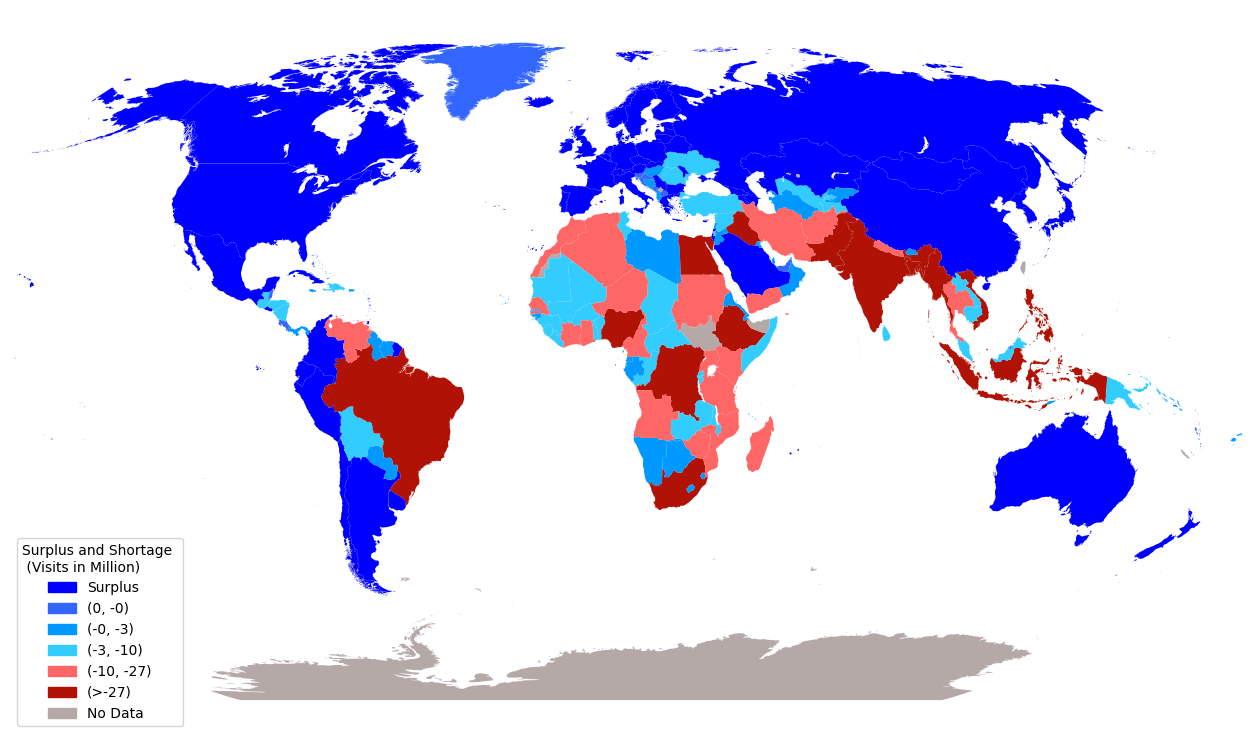

In [194]:
#########################################################################################
################################ 3 visits year ##########################################
######################## Physician only ###############################
##################################### Img7 ##############################################
#########################################################################################

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from slugify import slugify
import matplotlib.patches as mpatches
import re

#########################################################################################
######## Calculate quartiles (Q1, Q2, Q3, Q4) for the 'gaps_base_s1' column #############
#########################################################################################
gaps_base_s1 = df[df['gaps_hf_3_s1']>0]
Q1 = gaps_base_s1['gaps_hf_3_s1'].quantile(0.25)
Q2 = gaps_base_s1['gaps_hf_3_s1'].quantile(0.50)  # Median
Q3 = gaps_base_s1['gaps_hf_3_s1'].quantile(0.75)
Q4 = gaps_base_s1['gaps_hf_3_s1'].quantile(0.90)
Q5 = gaps_base_s1['gaps_hf_3_s1'].max()

print(Q1, Q2, Q3, Q4, Q5)

# Define the cut-off values
cut_off_1 = 0
cut_off_2 = round(Q1)
cut_off_3 = round(Q2)
cut_off_4 = round(Q3)
cut_off_5 = round(Q4)
cut_off_6 = round(Q5)

print(cut_off_5)

# Function to categorize values based on cut-off points
def categorize_gaps(value):
    if value <= cut_off_1:
        return 1
    elif cut_off_1 < value <= cut_off_2:
            return 2
    elif cut_off_2 < value <= cut_off_3:
        return 3
    elif cut_off_3 < value <= cut_off_4:
        return 4
    elif cut_off_4 < value <= cut_off_5:
        return 5
    else:
        return 6

# Apply the function to the 'gaps_hf_6_s1' column
df['gaps_cat4_3_s1'] = df['gaps_hf_3_s1'].apply(categorize_gaps)
df.head(10)

print(df['gaps_cat4_3_s1'].describe(include='object'))

# Frequency counts
frequency_counts = df['gaps_cat4_3_s1'].value_counts()

# Relative frequencies
relative_frequencies = df['gaps_cat4_3_s1'].value_counts(normalize=True)

# Combining both into a DataFrame
summary_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'Relative Frequency': relative_frequencies,
    'Percentage': relative_frequencies * 100
})

# To view the summary DataFrame
print(summary_df)

df.columns

df.to_csv('data_for_map.csv', index=False)
df = pd.read_csv("./data_for_map.csv")
df.columns
# gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
# gdf.columns

######################################GIS GRAPHS################################################
################################################################################################
# Custom function to create a valid filename
def simple_slugify(value):
    # Remove special characters and replace spaces with hyphens
    value = re.sub(r'[^\w\s-]', '', value).strip().lower()  # Keep only word characters and spaces
    value = re.sub(r'[\s]+', '-', value)  # Replace spaces with hyphens
    return value

# Define parameters
figsize = (16, 10)
year = 'gaps_cat4_3_s1'  # Use 'gaps_cat4_hf_6' as the variable name
title = ''
imgfile = 'img77/{}.png'.format(simple_slugify(title))
description = ''''''.strip()

# Load GeoDataFrame and data
gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
df = pd.read_csv("./data_for_map.csv")

# Assuming df is already renamed as:
df = df.rename(columns={"Country": "Country", "Code": "Country Code"})

gaps_hf_6_s1 = df[df['gaps_hf_3_s1']>0]
t1 = gaps_hf_6_s1['gaps_hf_3_s1'].quantile(0.25)
t2 = gaps_hf_6_s1['gaps_hf_3_s1'].quantile(0.50)  # Median
t3 = gaps_hf_6_s1['gaps_hf_3_s1'].quantile(0.75)
t4 = gaps_hf_6_s1['gaps_hf_3_s1'].quantile(0.90)
t5 = gaps_hf_6_s1['gaps_hf_3_s1'].max()

# 985594.1676 4076002.788 14268291.94875 35761464.534600034 910094182.4
# Define the cut-off values

Q1 = round(t1/1000000)
Q2  = round(t2/1000000)
Q3 = round(t3/1000000)
Q4  = round(t4/1000000)
Q5  = round(t5/1000000)

print(Q1, Q2, Q3, Q4, Q5)

# Perform a left join to include all rows from gdf (even if no match is found in df)
merged = gdf.merge(df, how='left', left_on='ADM0_A3', right_on='Country Code')

# Define the custom color categories for 'gaps_cat4_hf_6'
def assign_color(row):
    if  row[year] == 1:
        return 'Surplus'
    elif row[year] == 2:
        return f'(0, -{round(Q1)})'
    elif row[year] == 3:
        return f'(-{round(Q1)}, -{round(Q2)})'
    elif row[year] == 4:
        return f'(-{round(Q2)}, -{round(Q3)})'
    elif row[year] == 5:
        return f'(-{round(Q3)}, -{round(Q4)})'
    elif row[year] == 6:
        return f'(>-{round(Q4)})'
    else:
        return 'No Data'

# Create a new column 'category' with the assigned colors
merged['category'] = merged.apply(assign_color, axis=1)

# Define a color map for the categories
colors = {
    'Surplus': '#0000ff',  # Blue
    f'(0, -{round(Q1)})': '#3366ff',  # Blue
    f'(-{round(Q1)}, -{round(Q2)})': '#0099ff',  # Light blue
    f'(-{round(Q2)}, -{round(Q3)})': '#33ccff',  # Medium red
    f'(-{round(Q3)}, -{round(Q4)})': '#ff6666',  # Darker red
    f'(>-{round(Q4)})': '#b01305',  # Darkest red
    'No Data': '#b5a9a8'  # Black for missing data
}

# Map the colors to the merged GeoDataFrame
merged['color'] = merged['category'].map(colors)

# Plot
fig, ax = plt.subplots(figsize=figsize)

# Plot the data using the color mapping
merged.plot(ax=ax, color=merged['color'], legend=False)

# Highlight missing data with a hatch pattern
missing_data = merged[merged['category'] == 'No data']
missing_data.plot(ax=ax, color='#66b3cc', hatch='///')

# Set plot title and annotations
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

# Customize plot appearance
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])

# Create custom legend using the categories and their corresponding colors
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_patches, title="Surplus and Shortage \n (Visits in Million)", loc="lower left")

# Create the directory if it does not exist
os.makedirs(os.path.dirname(imgfile), exist_ok=True)

# Save the figure to a file
plt.savefig(imgfile, dpi=600, bbox_inches='tight')

# Show the figure
plt.show()

754748.9609827938 3707265.2113170885 9833919.790874999 17610690.10460127 178254939.73903856
17610690
count    199.000000
mean       1.889447
std        1.448733
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        6.000000
Name: gaps_cat4_3_s1_i1, dtype: float64
                   Frequency  Relative Frequency  Percentage
gaps_cat4_3_s1_i1                                           
1                        131            0.658291   65.829146
3                         17            0.085427    8.542714
4                         17            0.085427    8.542714
2                         17            0.085427    8.542714
5                         10            0.050251    5.025126
6                          7            0.035176    3.517588
1 4 10 18 178


C:\Users\USER\AppData\Local\Temp\ipykernel_18608\2782743325.py:168: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  missing_data.plot(ax=ax, color='#66b3cc', hatch='///')


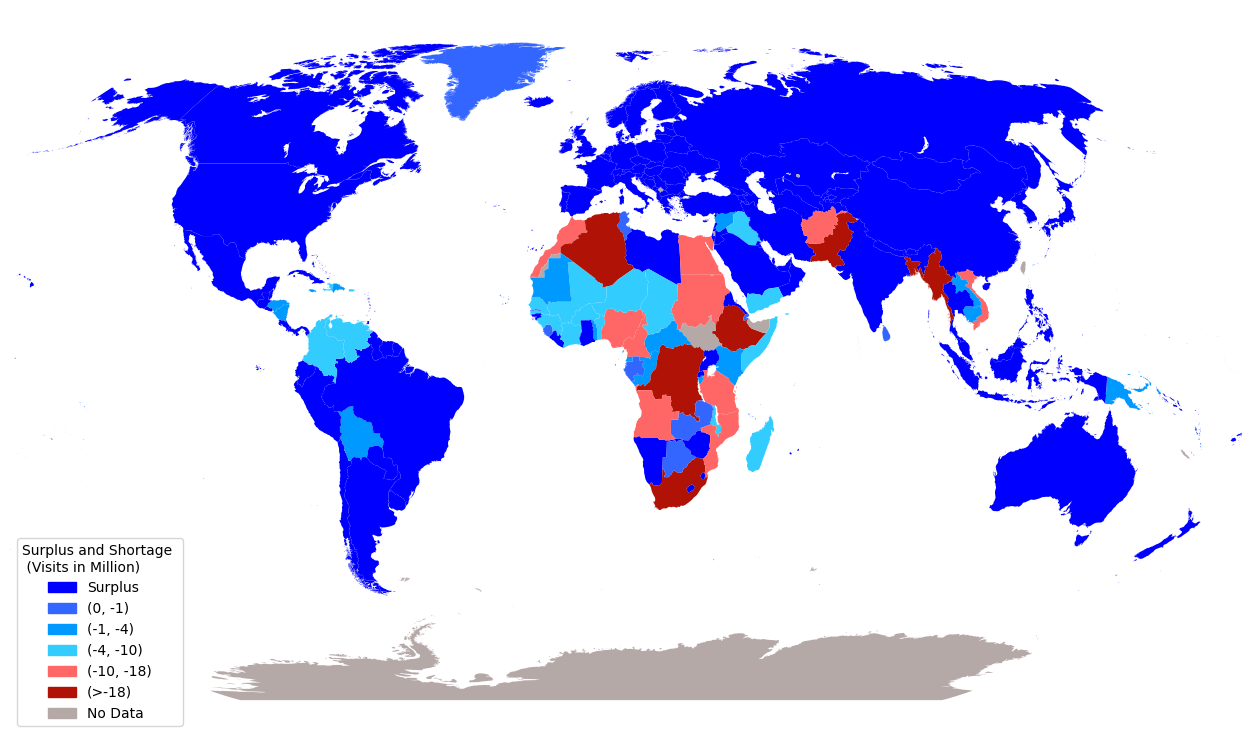

In [195]:
#########################################################################################
################################ 3 visits year ##########################################
######################## Non physician only ###############################
##################################### Img8 ##############################################
#########################################################################################

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from slugify import slugify
import matplotlib.patches as mpatches
import re

#########################################################################################
######## Calculate quartiles (Q1, Q2, Q3, Q4) for the 'gaps_base_s1' column #############
#########################################################################################
gaps_base_s1 = df[df['gaps_hf_3_s1_i1']>0]
Q1 = gaps_base_s1['gaps_hf_3_s1_i1'].quantile(0.25)
Q2 = gaps_base_s1['gaps_hf_3_s1_i1'].quantile(0.50)  # Median
Q3 = gaps_base_s1['gaps_hf_3_s1_i1'].quantile(0.75)
Q4 = gaps_base_s1['gaps_hf_3_s1_i1'].quantile(0.90)
Q5 = gaps_base_s1['gaps_hf_3_s1_i1'].max()

print(Q1, Q2, Q3, Q4, Q5)

# Define the cut-off values
cut_off_1 = 0
cut_off_2 = round(Q1)
cut_off_3 = round(Q2)
cut_off_4 = round(Q3)
cut_off_5 = round(Q4)
cut_off_6 = round(Q5)

print(cut_off_5)

# Function to categorize values based on cut-off points
def categorize_gaps(value):
    if value <= cut_off_1:
        return 1
    elif cut_off_1 < value <= cut_off_2:
            return 2
    elif cut_off_2 < value <= cut_off_3:
        return 3
    elif cut_off_3 < value <= cut_off_4:
        return 4
    elif cut_off_4 < value <= cut_off_5:
        return 5
    else:
        return 6

# Apply the function to the 'gaps_hf_6_s1' column
df['gaps_cat4_3_s1_i1'] = df['gaps_hf_3_s1_i1'].apply(categorize_gaps)
df.head(10)

print(df['gaps_cat4_3_s1_i1'].describe(include='object'))

# Frequency counts
frequency_counts = df['gaps_cat4_3_s1_i1'].value_counts()

# Relative frequencies
relative_frequencies = df['gaps_cat4_3_s1_i1'].value_counts(normalize=True)

# Combining both into a DataFrame
summary_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'Relative Frequency': relative_frequencies,
    'Percentage': relative_frequencies * 100
})

# To view the summary DataFrame
print(summary_df)

df.columns

df.to_csv('data_for_map.csv', index=False)
df = pd.read_csv("./data_for_map.csv")
df.columns
# gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
# gdf.columns

######################################GIS GRAPHS################################################
################################################################################################
# Custom function to create a valid filename
def simple_slugify(value):
    # Remove special characters and replace spaces with hyphens
    value = re.sub(r'[^\w\s-]', '', value).strip().lower()  # Keep only word characters and spaces
    value = re.sub(r'[\s]+', '-', value)  # Replace spaces with hyphens
    return value

# Define parameters
figsize = (16, 10)
year = 'gaps_cat4_3_s1_i1'  # Use 'gaps_cat4_hf_6' as the variable name
title = ''
imgfile = 'img88/{}.png'.format(simple_slugify(title))
description = ''''''.strip()

# Load GeoDataFrame and data
gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
df = pd.read_csv("./data_for_map.csv")

# Assuming df is already renamed as:
df = df.rename(columns={"Country": "Country", "Code": "Country Code"})

gaps_hf_6_s1 = df[df['gaps_hf_3_s1_i1']>0]
t1 = gaps_hf_6_s1['gaps_hf_3_s1_i1'].quantile(0.25)
t2 = gaps_hf_6_s1['gaps_hf_3_s1_i1'].quantile(0.50)  # Median
t3 = gaps_hf_6_s1['gaps_hf_3_s1_i1'].quantile(0.75)
t4 = gaps_hf_6_s1['gaps_hf_3_s1_i1'].quantile(0.90)
t5 = gaps_hf_6_s1['gaps_hf_3_s1_i1'].max()

# 985594.1676 4076002.788 14268291.94875 35761464.534600034 910094182.4
# Define the cut-off values

Q1 = round(t1/1000000)
Q2  = round(t2/1000000)
Q3 = round(t3/1000000)
Q4  = round(t4/1000000)
Q5  = round(t5/1000000)

print(Q1, Q2, Q3, Q4, Q5)

# Perform a left join to include all rows from gdf (even if no match is found in df)
merged = gdf.merge(df, how='left', left_on='ADM0_A3', right_on='Country Code')

# Define the custom color categories for 'gaps_cat4_hf_6'
def assign_color(row):
    if  row[year] == 1:
        return 'Surplus'
    elif row[year] == 2:
        return f'(0, -{round(Q1)})'
    elif row[year] == 3:
        return f'(-{round(Q1)}, -{round(Q2)})'
    elif row[year] == 4:
        return f'(-{round(Q2)}, -{round(Q3)})'
    elif row[year] == 5:
        return f'(-{round(Q3)}, -{round(Q4)})'
    elif row[year] == 6:
        return f'(>-{round(Q4)})'
    else:
        return 'No Data'

# Create a new column 'category' with the assigned colors
merged['category'] = merged.apply(assign_color, axis=1)

# Define a color map for the categories
colors = {
    'Surplus': '#0000ff',  # Blue
    f'(0, -{round(Q1)})': '#3366ff',  # Blue
    f'(-{round(Q1)}, -{round(Q2)})': '#0099ff',  # Light blue
    f'(-{round(Q2)}, -{round(Q3)})': '#33ccff',  # Medium red
    f'(-{round(Q3)}, -{round(Q4)})': '#ff6666',  # Darker red
    f'(>-{round(Q4)})': '#b01305',  # Darkest red
    'No Data': '#b5a9a8'  # Black for missing data
}

# Map the colors to the merged GeoDataFrame
merged['color'] = merged['category'].map(colors)

# Plot
fig, ax = plt.subplots(figsize=figsize)

# Plot the data using the color mapping
merged.plot(ax=ax, color=merged['color'], legend=False)

# Highlight missing data with a hatch pattern
missing_data = merged[merged['category'] == 'No data']
missing_data.plot(ax=ax, color='#66b3cc', hatch='///')

# Set plot title and annotations
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

# Customize plot appearance
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])

# Create custom legend using the categories and their corresponding colors
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_patches, title="Surplus and Shortage \n (Visits in Million)", loc="lower left")

# Create the directory if it does not exist
os.makedirs(os.path.dirname(imgfile), exist_ok=True)

# Save the figure to a file
plt.savefig(imgfile, dpi=600, bbox_inches='tight')

# Show the figure
plt.show()

775987.212055679 3220832.93096842 7587137.548012714 13455635.378261402 102374939.73903854
13455635
count    199.000000
mean       1.668342
std        1.322132
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: gaps_cat4_3_s1_c, dtype: float64
                  Frequency  Relative Frequency  Percentage
gaps_cat4_3_s1_c                                           
1                       148            0.743719   74.371859
2                        13            0.065327    6.532663
3                        13            0.065327    6.532663
4                        12            0.060302    6.030151
5                         7            0.035176    3.517588
6                         6            0.030151    3.015075
1 3 8 13 102


C:\Users\USER\AppData\Local\Temp\ipykernel_18608\1658349951.py:170: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  missing_data.plot(ax=ax, color='#66b3cc', hatch='///')


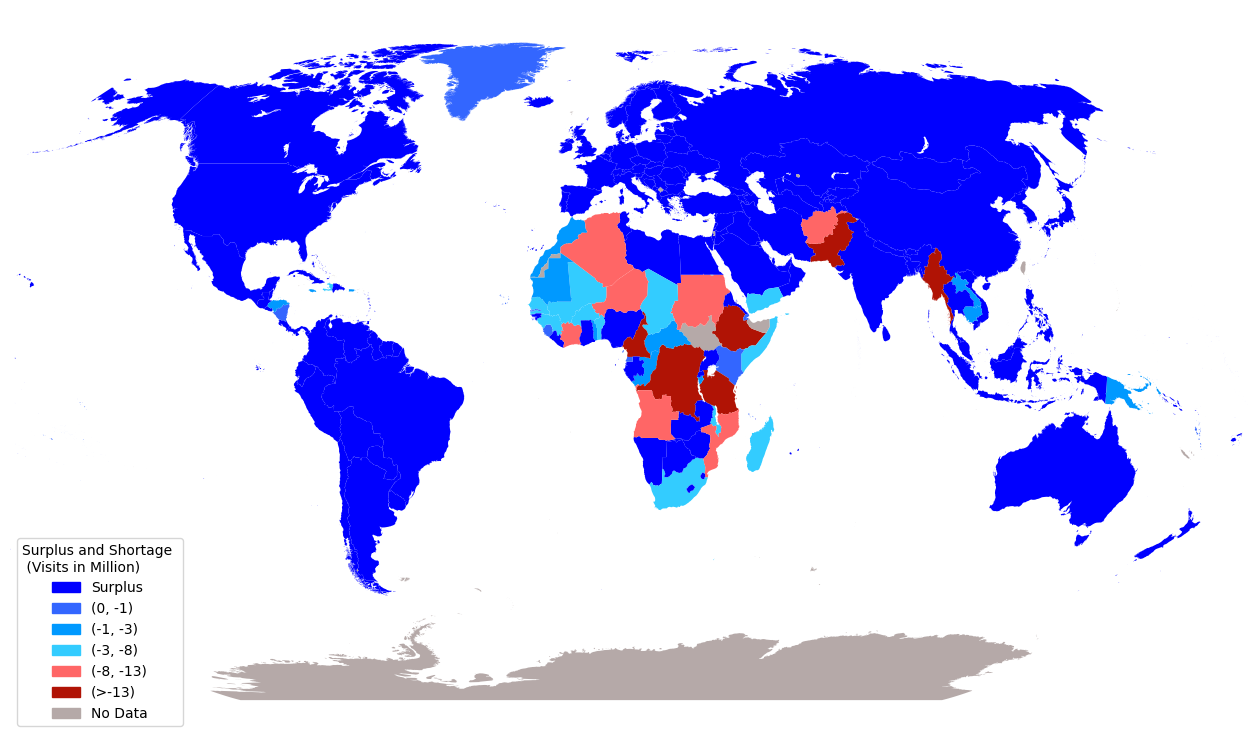

In [196]:
#########################################################################################
################################ 3 visits year ##########################################
######################## Both physician and non physician only ##########################
##################################### Img9 ##############################################
#########################################################################################

import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from slugify import slugify
import matplotlib.patches as mpatches
import re

#########################################################################################
######## Calculate quartiles (Q1, Q2, Q3, Q4) for the 'gaps_base_s1' column #############
#########################################################################################
positive_gaps_dfa = df[df['gaps_hf_3_s1_c'] > 0]

# Calculate quantiles and max for 'gaps_base_s1'
Q1 = positive_gaps_dfa['gaps_hf_3_s1_c'].quantile(0.25)
Q2 = positive_gaps_dfa['gaps_hf_3_s1_c'].quantile(0.50)  # Median
Q3 = positive_gaps_dfa['gaps_hf_3_s1_c'].quantile(0.75)
Q4 = positive_gaps_dfa['gaps_hf_3_s1_c'].quantile(0.90)
Q5 = positive_gaps_dfa['gaps_hf_3_s1_c'].max()

print(Q1, Q2, Q3, Q4, Q5)

# Define the cut-off values
cut_off_1 = 0
cut_off_2 = round(Q1)
cut_off_3 = round(Q2)
cut_off_4 = round(Q3)
cut_off_5 = round(Q4)
cut_off_6 = round(Q5)

print(cut_off_5)

# Function to categorize values based on cut-off points
def categorize_gaps(value):
    if value <= cut_off_1:
        return 1
    elif cut_off_1 < value <= cut_off_2:
            return 2
    elif cut_off_2 < value <= cut_off_3:
        return 3
    elif cut_off_3 < value <= cut_off_4:
        return 4
    elif cut_off_4 < value <= cut_off_5:
        return 5
    else:
        return 6

# Apply the function to the 'gaps_hf_6_s1' column
df['gaps_cat4_3_s1_c'] = df['gaps_hf_3_s1_c'].apply(categorize_gaps)
df.head(10)

print(df['gaps_cat4_3_s1_c'].describe(include='object'))

# Frequency counts
frequency_counts = df['gaps_cat4_3_s1_c'].value_counts()

# Relative frequencies
relative_frequencies = df['gaps_cat4_3_s1_c'].value_counts(normalize=True)

# Combining both into a DataFrame
summary_df = pd.DataFrame({
    'Frequency': frequency_counts,
    'Relative Frequency': relative_frequencies,
    'Percentage': relative_frequencies * 100
})

# To view the summary DataFrame
print(summary_df)

df.columns

df.to_csv('data_for_map.csv', index=False)
df = pd.read_csv("./data_for_map.csv")
df.columns
# gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
# gdf.columns

######################################GIS GRAPHS################################################
################################################################################################
# Custom function to create a valid filename
def simple_slugify(value):
    # Remove special characters and replace spaces with hyphens
    value = re.sub(r'[^\w\s-]', '', value).strip().lower()  # Keep only word characters and spaces
    value = re.sub(r'[\s]+', '-', value)  # Replace spaces with hyphens
    return value

# Define parameters
figsize = (16, 10)
year = 'gaps_cat4_3_s1_c'  # Use 'gaps_cat4_hf_6' as the variable name
title = ''
imgfile = 'img99/{}.png'.format(simple_slugify(title))
description = ''''''.strip()

# Load GeoDataFrame and data
gdf = gpd.read_file("./ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes.shp")[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
df = pd.read_csv("./data_for_map.csv")

# Assuming df is already renamed as:
df = df.rename(columns={"Country": "Country", "Code": "Country Code"})

gaps_hf_6_s1 = df[df['gaps_hf_3_s1_c']>0]
t1 = gaps_hf_6_s1['gaps_hf_3_s1_c'].quantile(0.25)
t2 = gaps_hf_6_s1['gaps_hf_3_s1_c'].quantile(0.50)  # Median
t3 = gaps_hf_6_s1['gaps_hf_3_s1_c'].quantile(0.75)
t4 = gaps_hf_6_s1['gaps_hf_3_s1_c'].quantile(0.90)
t5 = gaps_hf_6_s1['gaps_hf_3_s1_c'].max()

# 985594.1676 4076002.788 14268291.94875 35761464.534600034 910094182.4
# Define the cut-off values

Q1 = round(t1/1000000)
Q2  = round(t2/1000000)
Q3 = round(t3/1000000)
Q4  = round(t4/1000000)
Q5  = round(t5/1000000)

print(Q1, Q2, Q3, Q4, Q5)

# Perform a left join to include all rows from gdf (even if no match is found in df)
merged = gdf.merge(df, how='left', left_on='ADM0_A3', right_on='Country Code')

# Define the custom color categories for 'gaps_cat4_hf_6'
def assign_color(row):
    if  row[year] == 1:
        return 'Surplus'
    elif row[year] == 2:
        return f'(0, -{round(Q1)})'
    elif row[year] == 3:
        return f'(-{round(Q1)}, -{round(Q2)})'
    elif row[year] == 4:
        return f'(-{round(Q2)}, -{round(Q3)})'
    elif row[year] == 5:
        return f'(-{round(Q3)}, -{round(Q4)})'
    elif row[year] == 6:
        return f'(>-{round(Q4)})'
    else:
        return 'No Data'

# Create a new column 'category' with the assigned colors
merged['category'] = merged.apply(assign_color, axis=1)

# Define a color map for the categories
colors = {
    'Surplus': '#0000ff',  # Blue
    f'(0, -{round(Q1)})': '#3366ff',  # Blue
    f'(-{round(Q1)}, -{round(Q2)})': '#0099ff',  # Light blue
    f'(-{round(Q2)}, -{round(Q3)})': '#33ccff',  # Medium red
    f'(-{round(Q3)}, -{round(Q4)})': '#ff6666',  # Darker red
    f'(>-{round(Q4)})': '#b01305',  # Darkest red
    'No Data': '#b5a9a8'  # Black for missing data
}

# Map the colors to the merged GeoDataFrame
merged['color'] = merged['category'].map(colors)

# Plot
fig, ax = plt.subplots(figsize=figsize)

# Plot the data using the color mapping
merged.plot(ax=ax, color=merged['color'], legend=False)

# Highlight missing data with a hatch pattern
missing_data = merged[merged['category'] == 'No data']
missing_data.plot(ax=ax, color='#66b3cc', hatch='///')

# Set plot title and annotations
ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

# Customize plot appearance
ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])

# Create custom legend using the categories and their corresponding colors
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in colors.items()]
plt.legend(handles=legend_patches, title="Surplus and Shortage \n (Visits in Million)", loc="lower left")

# Create the directory if it does not exist
os.makedirs(os.path.dirname(imgfile), exist_ok=True)

# Save the figure to a file
plt.savefig(imgfile, dpi=600, bbox_inches='tight')

# Show the figure
plt.show()

In [ ]:
print("thank you Python")